In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, quarter_plot,  plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
pd.set_option('display.max_columns', None) #Set pandas to display all columns
pd.options.display.float_format = '{:,.4f}'.format # Set pandas to format all float numbers with commas and 2 decimal places

In [2]:
#Loading the processed dataset with all features and printing the first 10 rows
df=pd.read_csv("../data/features/Stocks_dataset_ml.csv",index_col='Date',parse_dates=True)
df.head(10)

,Ticker,Open,High,Low,Close,Volume,Return_Pct,Price_Range,Price_Range_Pct,Realized_Vol_10d,Realized_Vol_20d,MA_20,MA_50,MA_200,Volume_MA_20,Volume_Ratio,Momentum_5d,Target_Return_Next,Target_Vol_Next,Fed_Funds_Rate,CPI,Unemployment_Rate,GDP,Yield_Curve_10Y_2Y,VIX
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2011-03-08,GOOGL,14.7364,14.8620,14.6686,14.7210,91304604,0.0011,0.1934,0.0131,0.0108,0.0113,15.2317,15.2203,15.0527,"97,045,457.4000",0.9408,-0.0141,-0.0009,0.0107,0.1400,223.0460,9.0000,"15,351.4480",2.8300,19.8200
2011-03-08,MSFT,19.8132,20.0054,19.7209,19.9208,50549800,0.0074,0.2845,0.0143,0.0078,0.0080,20.5577,21.1506,20.6695,"59,947,635.0000",0.8432,-0.0096,-0.0008,0.0078,0.1400,223.0460,9.0000,"15,351.4480",2.8300,19.8200
2011-03-08,AAPL,10.6544,10.7292,10.5746,10.6800,356316800,0.0011,0.1546,0.0145,0.0113,0.0138,10.6172,10.3232,9.8740,"516,246,220.0000",0.6902,0.0185,-0.0092,0.0118,0.1400,223.0460,9.0000,"15,351.4480",2.8300,19.8200
2011-03-09,GOOGL,14.6885,14.7757,14.5580,14.7076,85953960,-0.0009,0.2177,0.0148,0.0107,0.0111,15.1987,15.2150,15.0493,"97,956,745.2000",0.8775,-0.0150,-0.0194,0.0119,0.1400,223.0460,9.0000,"15,351.4480",2.7800,20.2200
2011-03-09,MSFT,19.8439,19.9746,19.7286,19.9054,39789100,-0.0008,0.2460,0.0124,0.0078,0.0079,20.4722,21.1197,20.6619,"60,191,880.0000",0.6610,-0.0073,-0.0185,0.0085,0.1400,223.0460,9.0000,"15,351.4480",2.7800,20.2200
2011-03-09,AAPL,10.6478,10.6499,10.5251,10.5812,453306000,-0.0092,0.1249,0.0118,0.0118,0.0138,10.6131,10.3399,9.8810,"519,859,480.0000",0.8720,0.0010,-0.0165,0.0133,0.1400,223.0460,9.0000,"15,351.4480",2.7800,20.2200
2011-03-10,MSFT,19.6979,19.7670,19.4903,19.5364,66549500,-0.0185,0.2768,0.0142,0.0085,0.0084,20.3801,21.0822,20.6509,"60,874,100.0000",1.0932,-0.0302,0.0106,0.0097,0.1400,223.0460,9.0000,"15,351.4480",2.7200,21.8800
2011-03-10,AAPL,10.4806,10.5001,10.3539,10.4071,507539200,-0.0165,0.1462,0.0140,0.0133,0.0141,10.5959,10.3526,9.8861,"521,099,180.0000",0.9740,-0.0358,0.0153,0.0133,0.1400,223.0460,9.0000,"15,351.4480",2.7200,21.8800
2011-03-10,GOOGL,14.5503,14.5796,14.4014,14.4225,124998876,-0.0194,0.1782,0.0124,0.0119,0.0118,15.1537,15.2057,15.0431,"100,525,374.0000",1.2435,-0.0480,-0.0062,0.0116,0.1400,223.0460,9.0000,"15,351.4480",2.7200,21.8800


In [3]:
#Checking shape of dataset
df.shape

(11010, 25)

In [4]:
#checking for missing values and correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11010 entries, 2011-03-08 to 2025-10-08
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticker              11010 non-null  object 
 1   Open                11010 non-null  float64
 2   High                11010 non-null  float64
 3   Low                 11010 non-null  float64
 4   Close               11010 non-null  float64
 5   Volume              11010 non-null  int64  
 6   Return_Pct          11010 non-null  float64
 7   Price_Range         11010 non-null  float64
 8   Price_Range_Pct     11010 non-null  float64
 9   Realized_Vol_10d    11010 non-null  float64
 10  Realized_Vol_20d    11010 non-null  float64
 11  MA_20               11010 non-null  float64
 12  MA_50               11010 non-null  float64
 13  MA_200              11010 non-null  float64
 14  Volume_MA_20        11010 non-null  float64
 15  Volume_Ratio        11010 non-null  

The dataset has no missing values, and most are float data types

In [5]:
# Generate descriptive summary statistics for all numerical columns
df.describe()

,Open,High,Low,Close,Volume,Return_Pct,Price_Range,Price_Range_Pct,Realized_Vol_10d,Realized_Vol_20d,MA_20,MA_50,MA_200,Volume_MA_20,Volume_Ratio,Momentum_5d,Target_Return_Next,Target_Vol_Next,Fed_Funds_Rate,CPI,Unemployment_Rate,GDP,Yield_Curve_10Y_2Y,VIX
count,"11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000","11,010.0000"
mean,102.0803,103.1054,101.0654,102.1307,"91,663,882.9820",0.0010,2.0400,0.0194,0.0153,0.0158,101.2915,100.0267,94.4689,"92,175,751.2275",1.0040,0.0049,0.0010,0.0153,1.4744,260.5109,5.4144,"21,525.4789",0.8668,18.1464
std,103.5342,104.4897,102.5545,103.5708,"129,538,641.6798",0.0172,2.4550,0.0109,0.0083,0.0072,102.6752,101.3523,96.0422,"119,299,950.5135",0.3902,0.0363,0.0172,0.0083,1.8349,30.3470,1.9942,"4,554.1066",0.8774,6.9619
min,9.5068,9.5374,9.3212,9.4659,"7,164,500.0000",-0.1474,0.0537,0.0037,0.0020,0.0035,9.8946,10.1450,9.8740,"15,515,295.0000",0.2519,-0.2275,-0.1474,0.0020,0.0400,223.0460,3.4000,"15,351.4480",-1.0800,9.1400
25%,27.1413,27.3403,26.9264,27.1366,"27,474,350.0000",-0.0072,0.4099,0.0123,0.0099,0.0109,27.1790,26.9633,25.5525,"30,111,571.2500",0.7672,-0.0159,-0.0072,0.0099,0.0900,236.9830,3.9000,"17,912.0790",0.2200,13.5400
50%,55.2023,55.6820,54.5972,55.1335,"44,435,800.0000",0.0008,0.9583,0.0167,0.0134,0.0143,54.8339,54.4298,51.3700,"44,085,975.0000",0.9170,0.0059,0.0008,0.0134,0.3700,251.0180,4.7000,"20,328.5530",0.8300,16.2850
75%,145.8647,147.6116,144.5130,146.0459,"94,638,018.0000",0.0097,2.9237,0.0234,0.0186,0.0188,144.6075,144.0493,137.3219,"99,313,293.3000",1.1355,0.0254,0.0097,0.0186,2.3300,284.5250,6.7000,"25,250.3470",1.4900,20.6300
max,554.3187,554.5384,531.0270,534.7609,"1,506,120,000.0000",0.1626,39.9907,0.1629,0.0891,0.0713,519.0817,513.4646,452.0059,"807,239,580.0000",5.3757,0.2581,0.1626,0.0891,5.3300,323.3640,14.8000,"30,485.7290",2.8300,82.6900


## Key Insights from Data Summary

1.  **Skewed Growth Story:** The average `Close` price (**102.13**) is nearly double the median price (**55.13**). This indicates that the stocks experienced significant growth, with a few periods of very high prices pulling the average up, rather than a steady, consistent price.
2.  **"Fat Tail" Daily Risk:** The average `Return_Pct` is near zero (**0.10%**), but the min/max values are **-14.74% and +16.26%**. This shows that while most days are calm, the dataset includes rare, extreme days of both market panic and euphoria, which is a classic feature of stock market risk.
3.  **Extreme Weekly Volatility:** The 5-day momentum (`Momentum_5d`) has a min of **-22.75% and a max of +25.81%**. This demonstrates that the dataset contains periods of severe weekly crashes and intense rallies, highlighting significant short-term risk.
4.  **Recession Signal Confirmed:** The `Yield_Curve_10Y_2Y` has a minimum value of **-1.08**. A negative value signifies a "yield curve inversion," which is a historically reliable predictor of an upcoming economic recession. This dataset contains that powerful signal.
5.  **Full Range of Market Panic:** The `VIX` ("Fear Index") ranges from a min of **9.14** (extreme calm) to a max of **82.69**. A VIX over 80 is a rare, historic event (like the 2008 crash or March 2020), proving this dataset captures the full spectrum of market sentiment from complacency to full-blown panic.

In [6]:
#Check for null values
df.isnull().sum()

Ticker                0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Return_Pct            0
Price_Range           0
Price_Range_Pct       0
Realized_Vol_10d      0
Realized_Vol_20d      0
MA_20                 0
MA_50                 0
MA_200                0
Volume_MA_20          0
Volume_Ratio          0
Momentum_5d           0
Target_Return_Next    0
Target_Vol_Next       0
Fed_Funds_Rate        0
CPI                   0
Unemployment_Rate     0
GDP                   0
Yield_Curve_10Y_2Y    0
VIX                   0
dtype: int64

In [7]:
#Check for all columns
df.columns

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Return_Pct',
       'Price_Range', 'Price_Range_Pct', 'Realized_Vol_10d',
       'Realized_Vol_20d', 'MA_20', 'MA_50', 'MA_200', 'Volume_MA_20',
       'Volume_Ratio', 'Momentum_5d', 'Target_Return_Next', 'Target_Vol_Next',
       'Fed_Funds_Rate', 'CPI', 'Unemployment_Rate', 'GDP',
       'Yield_Curve_10Y_2Y', 'VIX'],
      dtype='object')

In [8]:
print(df['Ticker'].unique())

['GOOGL' 'MSFT' 'AAPL']


We have 3 tickers:-
1. Google
2. Microsoft
3. Apple

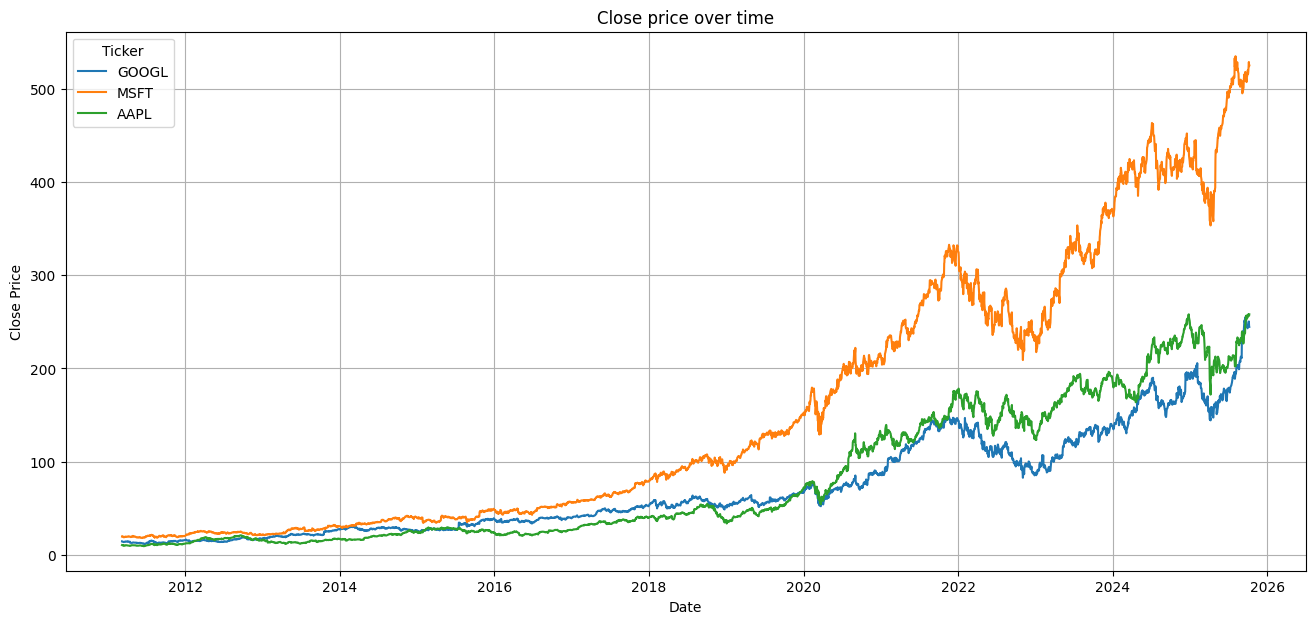

In [9]:
#Plot the closing price for each ticker over time
plt.figure(figsize=(16,7))
sns.lineplot(data=df,x='Date',y='Close',hue='Ticker')
plt.title('Close price over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

## Insight:

This plot reveals three key behaviours of the stocks:

1.  **Strong Long-Term Trend:** All three stocks show a powerful, long-term upward trend, confirming the "skewed growth" story we saw in the summary statistics.
2.  **High Positive Correlation:** The lines generally move in sync. They rise and fall together, indicating that they are highly correlated and driven by similar market-wide forces.
3.  **Sensitivity to Shocks:** We can visually identify major market-wide events where all three stocks dropped simultaneously. The most prominent are the sharp crash in early **2020 (COVID-19)** and the sustained downturn throughout **2022 (inflation/interest rate hikes)**.

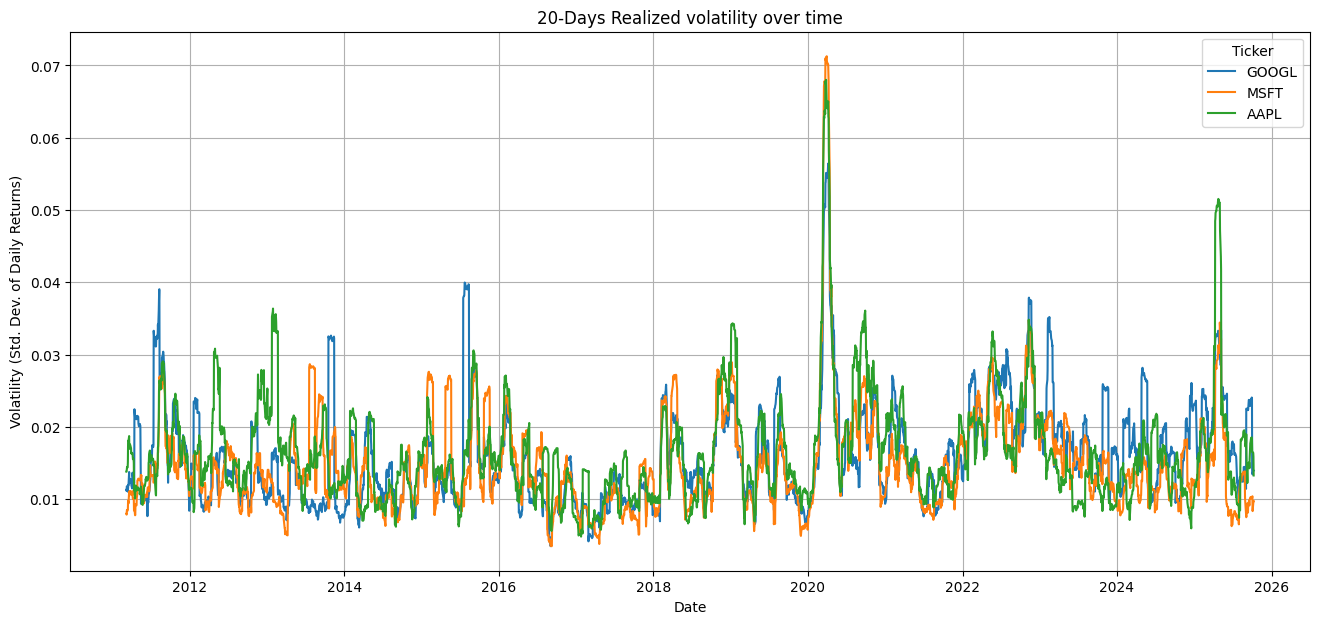

In [10]:
# Plot the 20-day realized volatility to observe market regimes
plt.figure(figsize=(16,7))
sns.lineplot(data=df, x='Date', y='Realized_Vol_20d', hue='Ticker')
plt.title('20-Days Realized volatility over time')
plt.xlabel('Date')
plt.ylabel('Volatility (Std. Dev. of Daily Returns)')
plt.grid(True)
plt.show()

## Insight:

This plot provides a clear picture of the market's risk profile:

1.  **Volatility Clustering:** The most important takeaway is **volatility clustering**. The plot shows clear "regimes." Periods of high volatility (spiky sections like 2020 & 2022) are clustered together, and periods of low volatility (flat sections like 2017) are also clustered.
2.  **Synchronized Shocks:** All three stocks spike at the same time, most notably the massive spike in **early 2020 (COVID-19)**. This confirms that market-wide fear is a primary driver of volatility for all tickers, visually supporting the strong correlation with the `VIX` we saw earlier.
3.  **Modeling Implications:** The fact that volatility is "clustered" (today's volatility is related to yesterday's) and "mean-reverting" (it tends to return to a baseline) is exactly what makes it predictable for our time series and ml models to forecast.

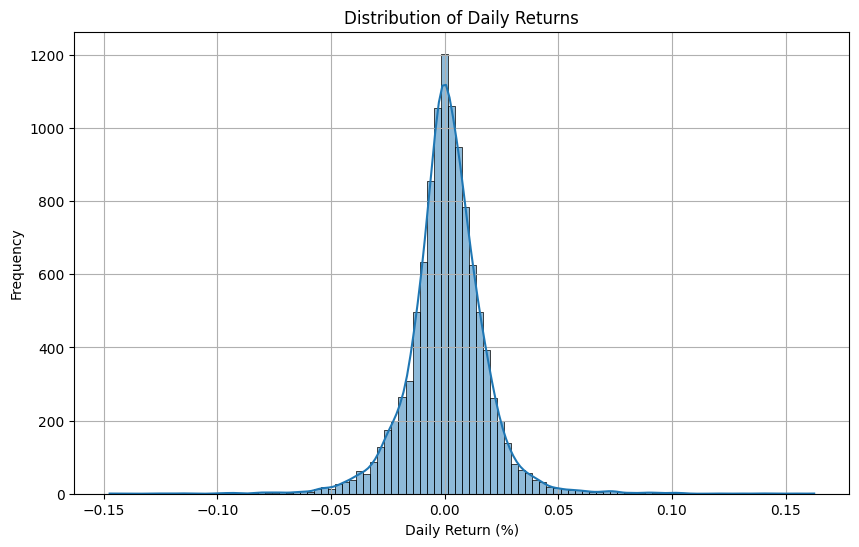

In [11]:
# Plot a histogram to show the distribution of daily returns for all tickers
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Return_Pct',bins=100,kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

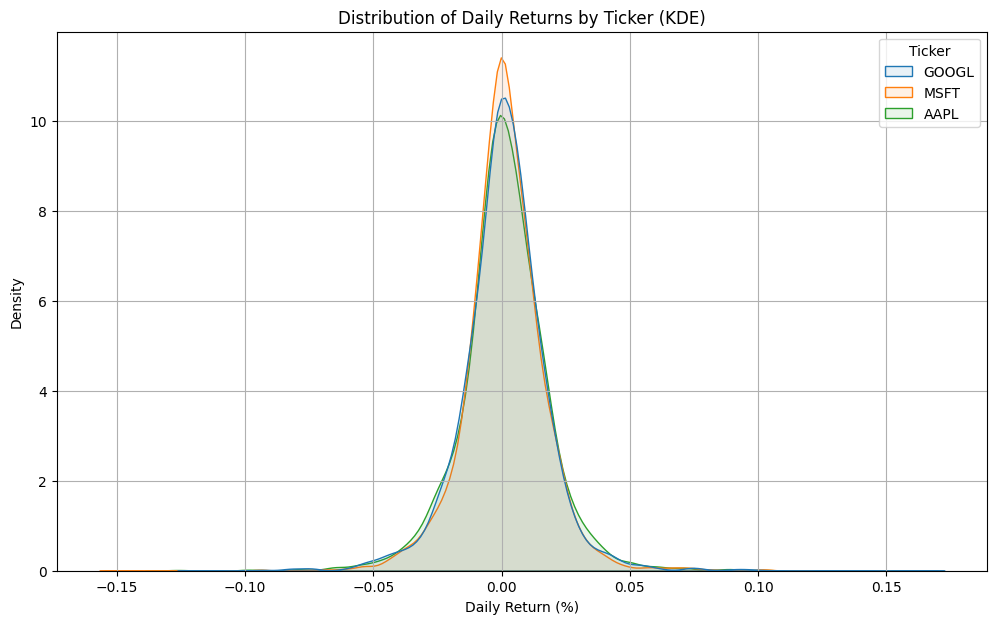

In [12]:
# Plot a histogram to show the distribution of daily returns for all tickers (KDE)
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df, x='Return_Pct', hue='Ticker', fill=True, alpha=0.1)
plt.title('Distribution of Daily Returns by Ticker (KDE)')
plt.xlabel('Daily Return (%)')
plt.grid(True)
plt.show()

## Insight: A Shared "Fat-Tailed" Risk Profile

These two plots work together to tell a complete story about risk.

1.  **The Aggregate View (Histogram):** The combined histogram clearly shows a **leptokurtic ("fat-tailed") distribution**. It has a much sharper peak at zero and heavier tails than a normal bell curve. This proves that the overall dataset is defined by long periods of calm (returns near 0%) punctuated by rare, extreme market swings.
2.  **The Comparative View (KDE Plot):** The overlaid KDE plot confirms this is **not an averaging artifact**. It shows that all three individual stocks (**AAPL, MSFT, and GOOGL**) share this *exact same* risk profile. Their distributions are nearly identical, proving they are all equally exposed to these "fat-tailed" events.

**Conclusion:** The "fat-tailed" distribution is a fundamental and uniform characteristic of all three tickers, not just the dataset as a whole.

In [13]:
# --- 1. Create Lagged Return_Pct Features ---
n_lags_ret = 3
print(f"Creating {n_lags_ret} lag features for: Return_Pct")
for i in range(1, n_lags_ret + 1):
    df[f'Return_Pct_lag_{i}'] = df.groupby('Ticker')['Return_Pct'].shift(i)

# --- 2. Create Ratio and Z-score Features ---
print("Creating ratio and Z-score features...")

# Momentum Ratios (handle potential division by zero if MAs can be zero)
df['Momentum_Ratio_S_M'] = df['MA_20'] / df['MA_50']
df['Momentum_Ratio_M_L'] = df['MA_50'] / df['MA_200']

# Volatility Ratio (handle potential division by zero)
# Add a small epsilon to avoid division by zero if vol can be zero
epsilon = 1e-6
df['Volatility_Ratio'] = df['Realized_Vol_10d'] / (df['Realized_Vol_20d'] + epsilon)

# Z-score of Price (handle potential division by zero)
# Add .clip() at the end to cap the values
# We'll use ±5 as your report suggested.
df['Price_ZScore'] = ((df['Close'] - df['MA_20']) / (df['Realized_Vol_10d'] + epsilon)).clip(-5, 5)

print("✅ New features created.")

# --- 3. Handle NaNs ---
# These new features (lags, ratios involving rolling means) will introduce more NaNs
print(f"Original shape: {df.shape}")
df_final_features = df.dropna()
print(f"Shape after adding features and dropping NaNs: {df_final_features.shape}")
df.head(10)

Creating 3 lag features for: Return_Pct
Creating ratio and Z-score features...
✅ New features created.
Original shape: (11010, 32)
Shape after adding features and dropping NaNs: (11001, 32)


,Ticker,Open,High,Low,Close,Volume,Return_Pct,Price_Range,Price_Range_Pct,Realized_Vol_10d,Realized_Vol_20d,MA_20,MA_50,MA_200,Volume_MA_20,Volume_Ratio,Momentum_5d,Target_Return_Next,Target_Vol_Next,Fed_Funds_Rate,CPI,Unemployment_Rate,GDP,Yield_Curve_10Y_2Y,VIX,Return_Pct_lag_1,Return_Pct_lag_2,Return_Pct_lag_3,Momentum_Ratio_S_M,Momentum_Ratio_M_L,Volatility_Ratio,Price_ZScore
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-03-08,GOOGL,14.7364,14.8620,14.6686,14.7210,91304604,0.0011,0.1934,0.0131,0.0108,0.0113,15.2317,15.2203,15.0527,"97,045,457.4000",0.9408,-0.0141,-0.0009,0.0107,0.1400,223.0460,9.0000,"15,351.4480",2.8300,19.8200,NaN,NaN,NaN,1.0008,1.0111,0.9540,-5.0000
2011-03-08,MSFT,19.8132,20.0054,19.7209,19.9208,50549800,0.0074,0.2845,0.0143,0.0078,0.0080,20.5577,21.1506,20.6695,"59,947,635.0000",0.8432,-0.0096,-0.0008,0.0078,0.1400,223.0460,9.0000,"15,351.4480",2.8300,19.8200,NaN,NaN,NaN,0.9720,1.0233,0.9821,-5.0000
2011-03-08,AAPL,10.6544,10.7292,10.5746,10.6800,356316800,0.0011,0.1546,0.0145,0.0113,0.0138,10.6172,10.3232,9.8740,"516,246,220.0000",0.6902,0.0185,-0.0092,0.0118,0.1400,223.0460,9.0000,"15,351.4480",2.8300,19.8200,NaN,NaN,NaN,1.0285,1.0455,0.8153,5.0000
2011-03-09,GOOGL,14.6885,14.7757,14.5580,14.7076,85953960,-0.0009,0.2177,0.0148,0.0107,0.0111,15.1987,15.2150,15.0493,"97,956,745.2000",0.8775,-0.0150,-0.0194,0.0119,0.1400,223.0460,9.0000,"15,351.4480",2.7800,20.2200,0.0011,NaN,NaN,0.9989,1.0110,0.9598,-5.0000
2011-03-09,MSFT,19.8439,19.9746,19.7286,19.9054,39789100,-0.0008,0.2460,0.0124,0.0078,0.0079,20.4722,21.1197,20.6619,"60,191,880.0000",0.6610,-0.0073,-0.0185,0.0085,0.1400,223.0460,9.0000,"15,351.4480",2.7800,20.2200,0.0074,NaN,NaN,0.9693,1.0222,0.9940,-5.0000
2011-03-09,AAPL,10.6478,10.6499,10.5251,10.5812,453306000,-0.0092,0.1249,0.0118,0.0118,0.0138,10.6131,10.3399,9.8810,"519,859,480.0000",0.8720,0.0010,-0.0165,0.0133,0.1400,223.0460,9.0000,"15,351.4480",2.7800,20.2200,0.0011,NaN,NaN,1.0264,1.0464,0.8541,-2.7087
2011-03-10,MSFT,19.6979,19.7670,19.4903,19.5364,66549500,-0.0185,0.2768,0.0142,0.0085,0.0084,20.3801,21.0822,20.6509,"60,874,100.0000",1.0932,-0.0302,0.0106,0.0097,0.1400,223.0460,9.0000,"15,351.4480",2.7200,21.8800,-0.0008,0.0074,NaN,0.9667,1.0209,1.0145,-5.0000
2011-03-10,AAPL,10.4806,10.5001,10.3539,10.4071,507539200,-0.0165,0.1462,0.0140,0.0133,0.0141,10.5959,10.3526,9.8861,"521,099,180.0000",0.9740,-0.0358,0.0153,0.0133,0.1400,223.0460,9.0000,"15,351.4480",2.7200,21.8800,-0.0092,0.0011,NaN,1.0235,1.0472,0.9432,-5.0000
2011-03-10,GOOGL,14.5503,14.5796,14.4014,14.4225,124998876,-0.0194,0.1782,0.0124,0.0119,0.0118,15.1537,15.2057,15.0431,"100,525,374.0000",1.2435,-0.0480,-0.0062,0.0116,0.1400,223.0460,9.0000,"15,351.4480",2.7200,21.8800,-0.0009,0.0011,NaN,0.9966,1.0108,1.0063,-5.0000


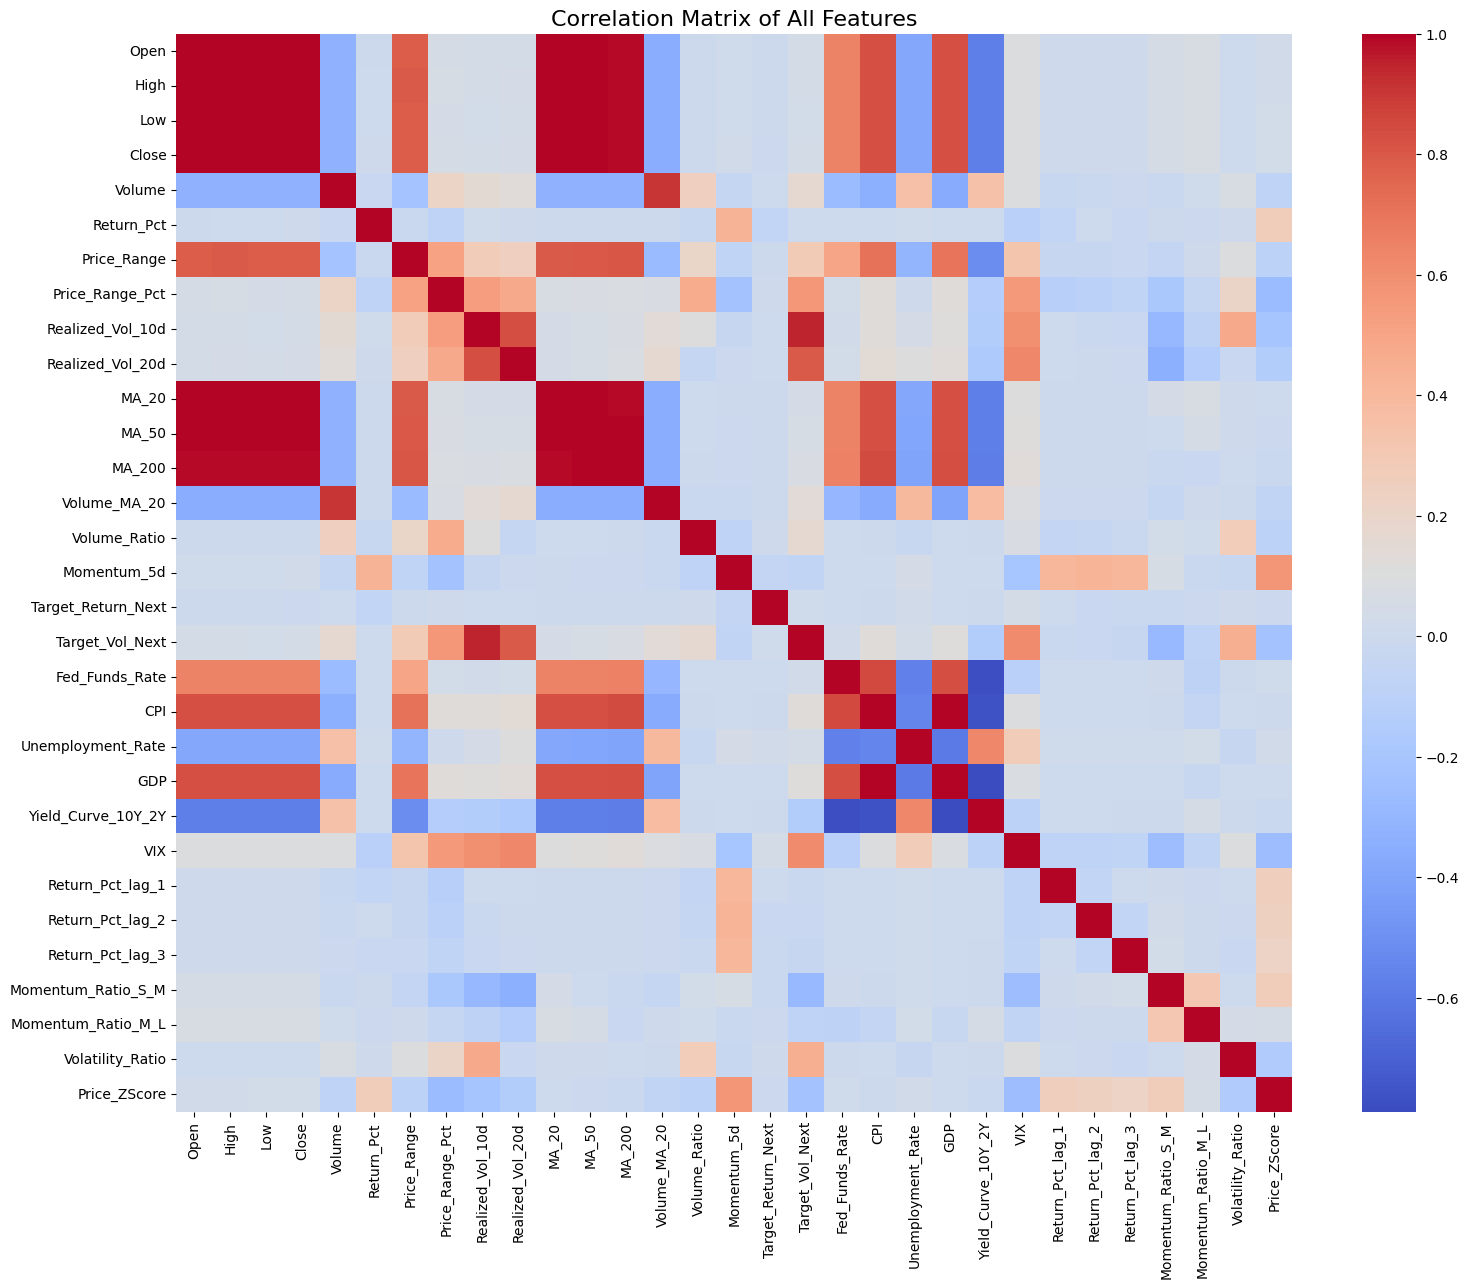

In [14]:
#Plot correlation matrix for all features
num_cols = df.select_dtypes(include=np.number)
corr_matrix = num_cols.corr()
plt.figure(figsize=(18,14))
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.show()

**Insight:**

This heatmap is the most important chart for guiding our modeling strategy. It clearly shows that our two target variables have completely different characteristics.

**1. The Challenge: Predicting Returns (Target_Return_Next)**
The entire row corresponding to `Target_Return_Next` is almost completely blank (light-colored).

* **What this means:** There are no strong linear predictors for next-day returns in our dataset.
* **Implication:** This is a critical finding. It proves that predicting returns is extremely difficult and that a simple linear model will likely fail. This task will require a complex, non-linear model (like XGBoost) to find any subtle, interactive patterns.

**2. The Opportunity: Predicting Volatility (Target_Vol_Next)**
This row is the complete opposite. It's full of strong, dark colors, telling us we have several excellent predictors.

* **Strong Positive (Dark Red) 🔴:** The strongest relationships are with `Realized_Vol_10d`, `Realized_Vol_20d`, `Price_Range_Pct`, and the `VIX`. This makes perfect intuitive sense: the best predictors of future volatility are past volatility and market fear.
* **Moderate Negative (Blue) 🔵:** We see a clear negative correlation with the `Yield_Curve_10Y_2Y`. This is a powerful signal, suggesting that when the economy is stressed (a low or inverted yield curve), market volatility tends to be higher.

**Conclusion:** We have a very promising and interpretable set of features for our volatility model. The returns model will be a much tougher challenge.

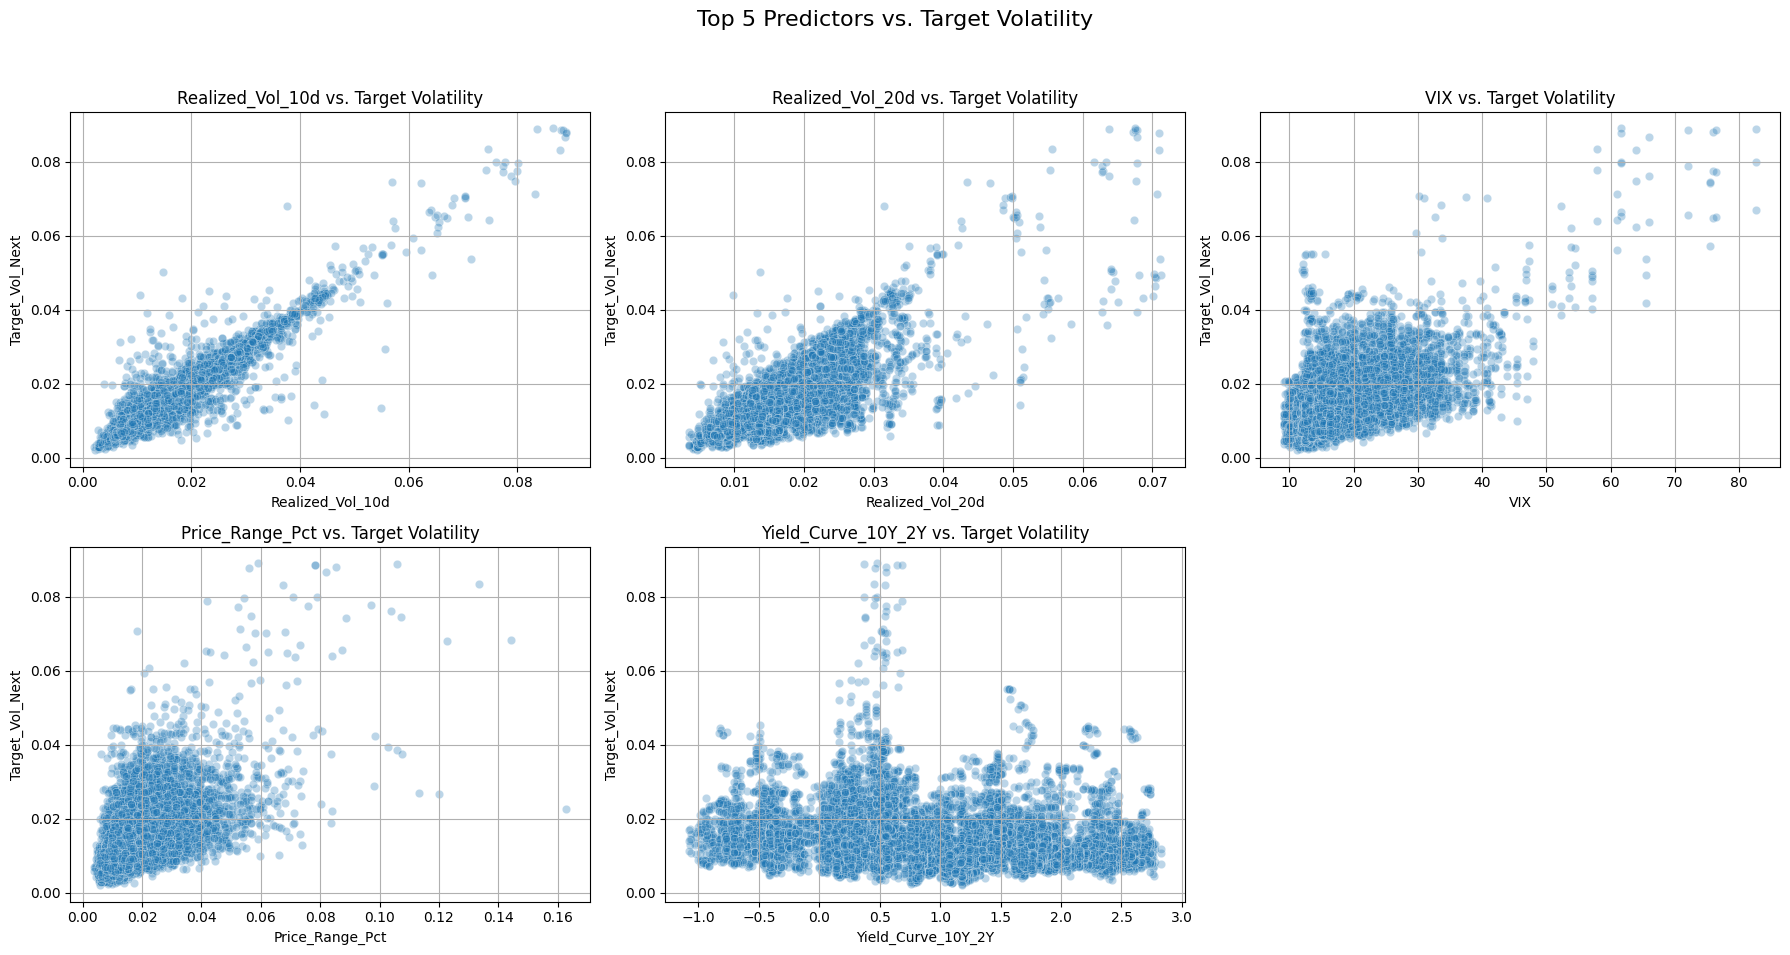

In [15]:
#Scatter plots for top 5 features
top_5_features = [
    'Realized_Vol_10d',
    'Realized_Vol_20d',
    'VIX',
    'Price_Range_Pct',
    'Yield_Curve_10Y_2Y'
]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Top 5 Predictors vs. Target Volatility', fontsize=16)
axes = axes.flatten()
for i, feature in enumerate(top_5_features):
    sns.scatterplot(data=df, x=feature, y='Target_Vol_Next', ax=axes[i], alpha=0.3)
    axes[i].set_title(f'{feature} vs. Target Volatility')
    axes[i].grid(True)
fig.delaxes(axes[5])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Insight: 

These scatter plots visually confirm the relationships we discovered in the heatmap and add important new details.

1.  **Strong Linear Predictors:** `Realized_Vol_10d`, `Realized_Vol_20d`, and `Price_Range_Pct` all show a **strong, positive, and linear relationship** with `Target_Vol_Next`. The points form a tight, clear line, confirming that past volatility is the most reliable predictor of future volatility.
2.  **The "VIX Cone":** The `VIX` plot also shows a clear positive relationship, but it's not a simple line. It forms a **"cone" shape** (heteroscedasticity). This means when the VIX is low, future volatility is predictably low. But when the VIX is high, future volatility is also high *on average* but has a much wider range of possible outcomes.
3.  **The "Recession Indicator":** The `Yield_Curve_10Y_2Y` plot is the most complex. It confirms the negative relationship—note how the **highest volatility events** (points > 4.0) are clustered on the left side, particularly when the yield curve is negative (inverted). This confirms its role as a powerful **market stress indicator**.

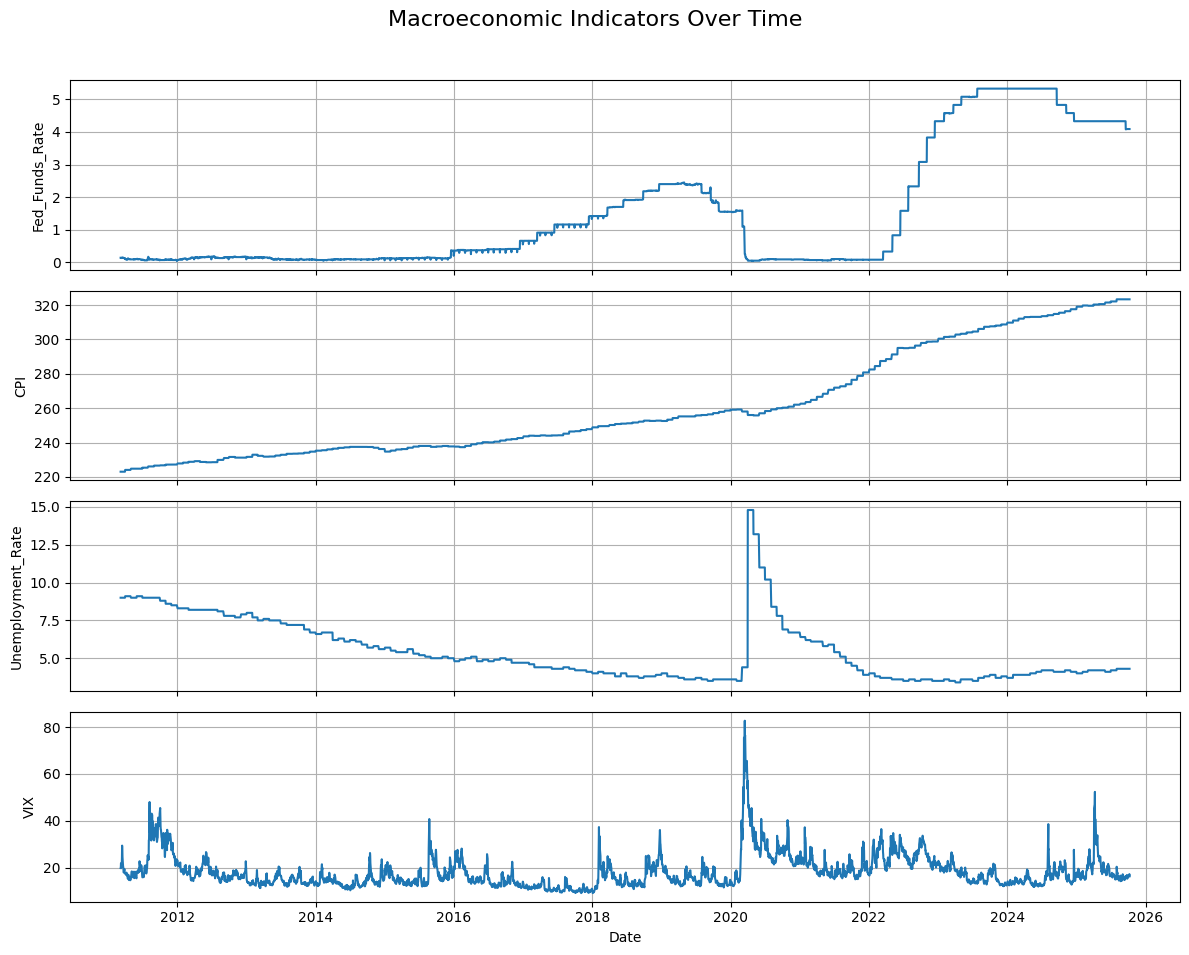

In [16]:
#Create the unique macro data 
macro_features = ['Fed_Funds_Rate', 'CPI', 'Unemployment_Rate', 'VIX']
if 'Date' not in df.columns:
    df_reset = df.reset_index()
else:
    df_reset = df
macro_df_unique = df_reset[['Date'] + macro_features].drop_duplicates(subset=['Date'])
# Create a figure and a grid of subplots (4 rows, 1 column)
fig, axes = plt.subplots(nrows=len(macro_features), ncols=1, figsize=(12, 10), sharex=True)
# Loop through each feature and plot it on its own axis
for i, feature in enumerate(macro_features):
    axes[i].plot(macro_df_unique['Date'], macro_df_unique[feature])
    axes[i].set_ylabel(feature)
    axes[i].grid(True)
fig.suptitle('Macroeconomic Indicators Over Time', fontsize=16)
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0.03, 1, 0.96]) 
plt.show()

## Insight:

This plot shows different "regimes" the market has experienced:

1.  **`Fed_Funds_Rate` (Interest Rates):** Shows a long period of near-zero rates (2011-2017), a slow hiking cycle (2017-2019), a return to zero during the pandemic (2020-2022), and finally a very steep hiking cycle to combat inflation (2022-onwards).
2.  **`CPI` (Inflation):** We see a long period of low, stable inflation followed by a sharp, sustained increase starting in 2021.
3.  **`Unemployment_Rate`:** This plot is dominated by a single event: the unprecedented, massive spike in unemployment in **early 2020** due to the COVID-19 pandemic.
4.  **`VIX` (Fear Index):** This plot perfectly mirrors our volatility chart. We can see the major spikes in **2020 (COVID-19)** and **2022 (inflation/rate hikes)**, confirming that these were periods of extreme market fear.

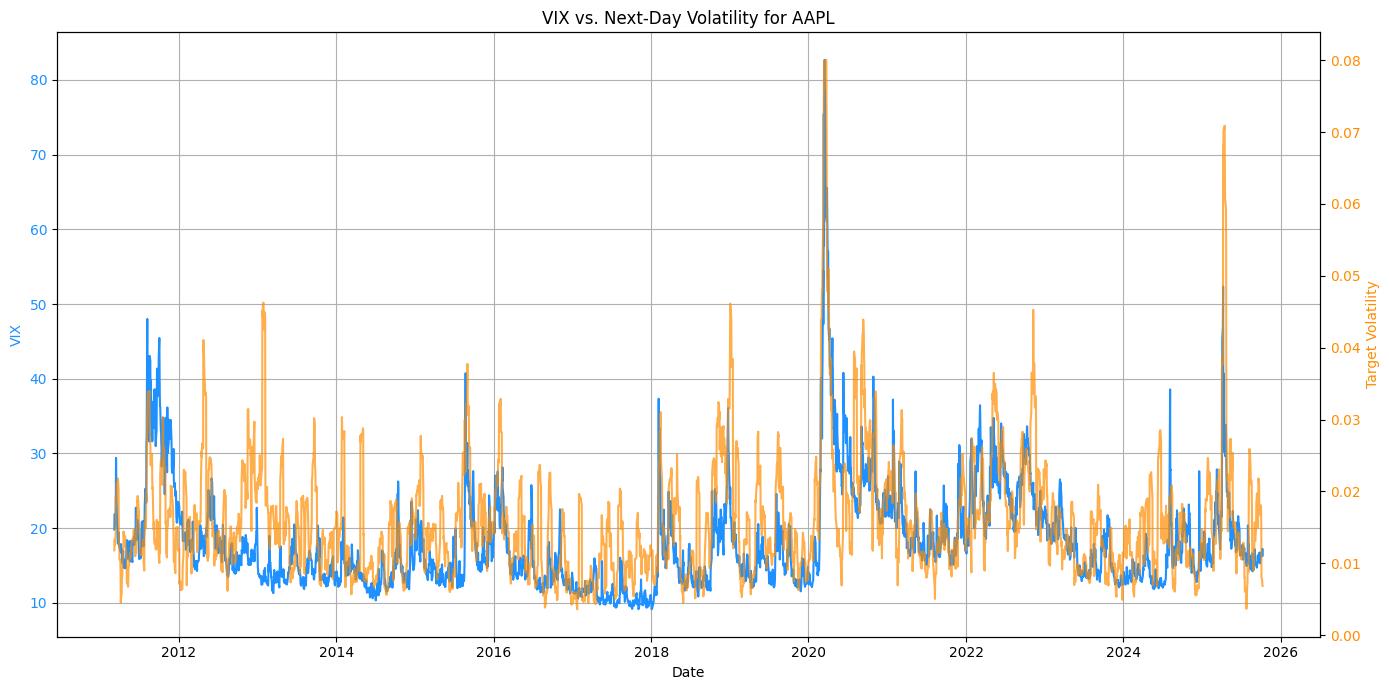

In [17]:
#Plot the VIX vs next day volatility for AAPL
aapl_df = df[df['Ticker'] == 'AAPL'].copy()
aapl_df.reset_index(inplace=True)
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df = aapl_df.sort_values('Date')
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('VIX vs. Next-Day Volatility for AAPL')
# Plot the VIX on the first axis (ax1)
ax1.plot(aapl_df['Date'], aapl_df['VIX'], color='dodgerblue', label='VIX (Left Axis)')
ax1.set_xlabel('Date')
ax1.set_ylabel('VIX', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')
ax1.grid(True)
# Create the second axis
ax2 = ax1.twinx()
# Plot the Target Volatility on the second axis (ax2)
ax2.plot(aapl_df['Date'], aapl_df['Target_Vol_Next'], color='darkorange', alpha=0.7, label='Target Volatility (Right Axis)')
ax2.set_ylabel('Target Volatility', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
# Display the plot
fig.tight_layout()
plt.show()

## Insight:

This plot reveals a crucial insight into the *nature* of the stock's volatility.

1.  **Highly Synchronized Trends:** The two lines, the `VIX` (blue) and Apple's `Target Volatility` (orange), are not just correlated; their trends are **virtually identical**. They share the same peaks (like in 2012, 2020, and 2022) and the same calm troughs (like 2017 and 2021).

2.  **What This Relationship Means:** The `VIX` represents the *expected* volatility for the *entire S&P 500 market* (this is called **systematic risk**). The orange line is the *actual* volatility for *just Apple*. The fact that they move in lockstep implies that the volatility of a large company like Apple is overwhelmingly driven by **broad market sentiment** and macroeconomic events, not by its own company-specific news (or **idiosyncratic risk**).

3.  **The Story in the Chart:** The plot shows a clear narrative. The long, flat period in 2017 was a time of low market-wide fear, and Apple's volatility was also consistently low. The explosive spike in 2020 was a market-wide panic, and Apple's volatility spiked in perfect unison. This shows that when the market panics, Apple panics with it.

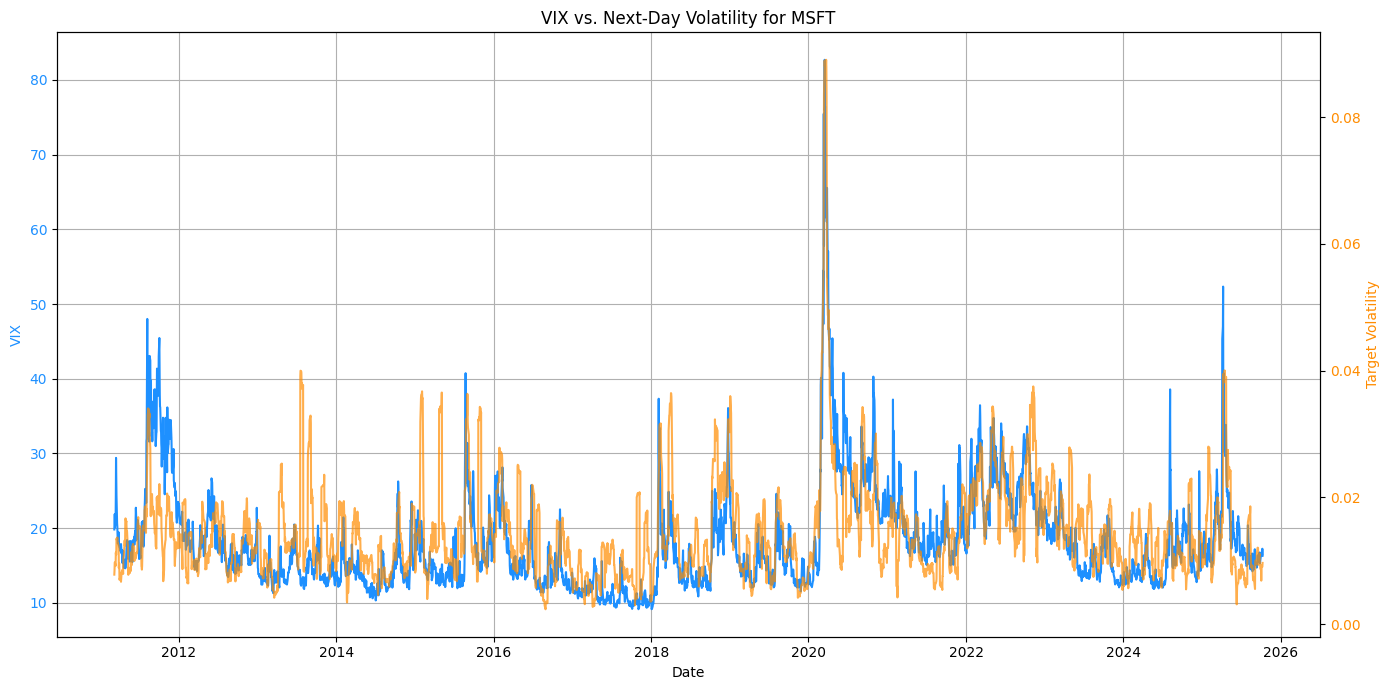

In [18]:
#Plot the VIX vs next day volatility for MSFT
msft_df = df[df['Ticker'] == 'MSFT'].copy()
msft_df.reset_index(inplace=True)
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
msft_df = msft_df.sort_values('Date')
#Create the dual-axis plot 
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('VIX vs. Next-Day Volatility for MSFT')
# Plot the VIX on the first axis (ax1)
ax1.plot(msft_df['Date'], msft_df['VIX'], color='dodgerblue', label='VIX (Left Axis)')
ax1.set_xlabel('Date')
ax1.set_ylabel('VIX', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')
ax1.grid(True)
# Create the second axis
ax2 = ax1.twinx()
# Plot the Target Volatility on the second axis (ax2)
ax2.plot(msft_df['Date'], msft_df['Target_Vol_Next'], color='darkorange', alpha=0.7, label='Target Volatility (Right Axis)')
ax2.set_ylabel('Target Volatility', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
# Display the plot
fig.tight_layout()
plt.show()

## Insight:

This plot for Microsoft reinforces the exact same conclusion we saw with Apple, perhaps even more clearly.

1.  **A Mirrored Pattern:** The `VIX` (blue line) and Microsoft's `Target Volatility` (orange line) are practically a mirror image of each other. They share the same peaks, troughs, and general shape across the entire 15-year period.
2.  **Systematic Risk Dominates:** The `VIX` measures *market-wide* fear. The fact that Microsoft's individual volatility tracks it so perfectly demonstrates that its risk profile is almost entirely dictated by **systematic (market) risk**, not company-specific (idiosyncratic) risk.
3.  **Key Events:** The relationship is undeniable during major events. The massive, shared spike in **2020 (COVID-19)** and the shared calm during **2017** show that Microsoft's volatility is a direct reflection of the broader market's sentiment.

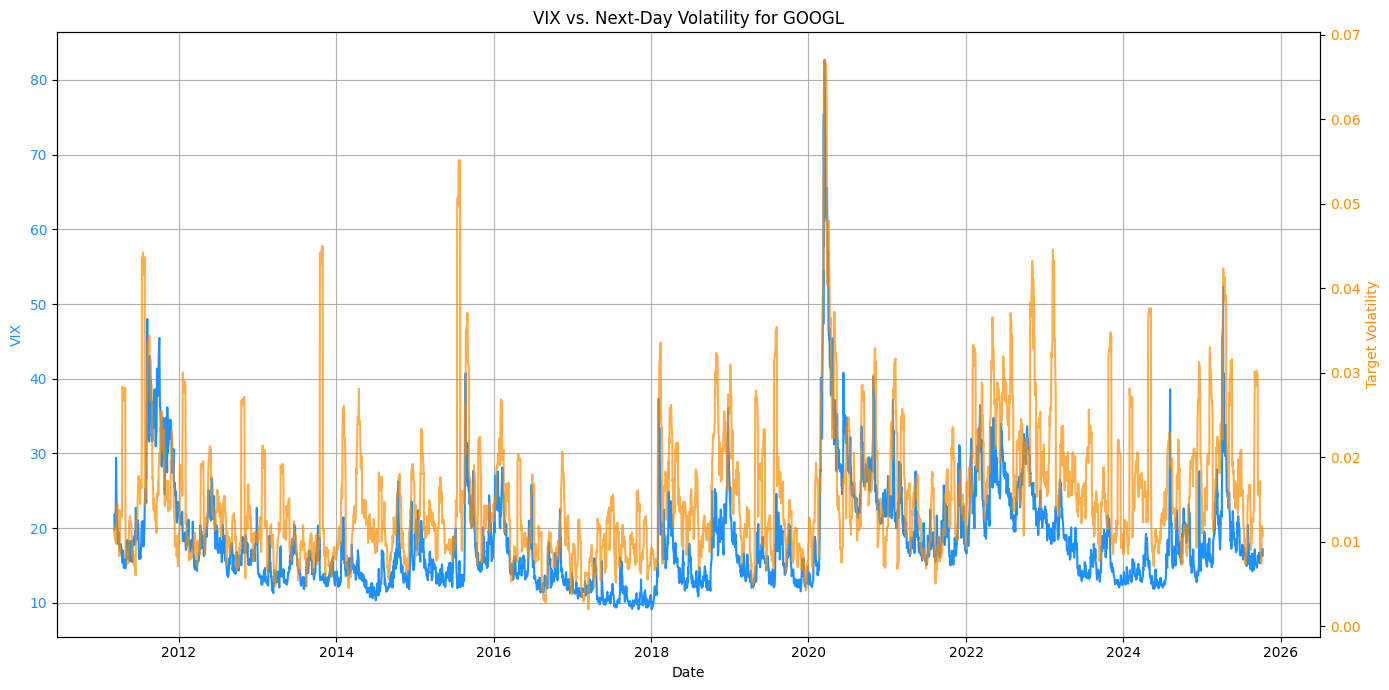

In [19]:
#Plot the VIX vs next day volatility for GOOGL
googl_df = df[df['Ticker'] == 'GOOGL'].copy()
googl_df.reset_index(inplace=True)
googl_df['Date'] = pd.to_datetime(googl_df['Date'])
googl_df = googl_df.sort_values('Date')
#2. Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('VIX vs. Next-Day Volatility for GOOGL')
# Plot the VIX on the first axis (ax1)
ax1.plot(googl_df['Date'], googl_df['VIX'], color='dodgerblue', label='VIX (Left Axis)')
ax1.set_xlabel('Date')
ax1.set_ylabel('VIX', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')
ax1.grid(True)
# Create the second axis
ax2 = ax1.twinx()
# Plot the Target Volatility on the second axis (ax2)
ax2.plot(googl_df['Date'], googl_df['Target_Vol_Next'], color='darkorange', alpha=0.7, label='Target Volatility (Right Axis)')
ax2.set_ylabel('Target Volatility', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
# Display the plot
fig.tight_layout()
plt.show()

## Insight:

This plot for Google completes the picture, confirming the trend we saw with Apple and Microsoft.

1.  **A Universal Pattern:** Just like the other two, Google's individual volatility (orange line) moves in lockstep with the `VIX` (blue line). This proves that the volatility for all three major tech stocks is overwhelmingly driven by **market-wide fear** (systematic risk).
2.  **Shared Story:** The key narrative beats are identical: a period of sustained calm from 2017-2018, a massive, shared spike in **2020 (COVID-19)**, and another volatile period in 2022.
3.  **Conclusion:** The EDA is conclusive. For large-cap tech stocks, individual company news is a minor factor for volatility compared to the macroeconomic climate and overall market sentiment. This gives us immense confidence that `VIX` is the most important external feature for our volatility model.

In [20]:
#Creating date components
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek
df['quarter'] = df.index.quarter
df[['year', 'month', 'day_of_week', 'quarter']].head()

,year,month,day_of_week,quarter
Date,,,,
2011-03-08,2011,3,1,1
2011-03-08,2011,3,1,1
2011-03-08,2011,3,1,1
2011-03-09,2011,3,2,1
2011-03-09,2011,3,2,1


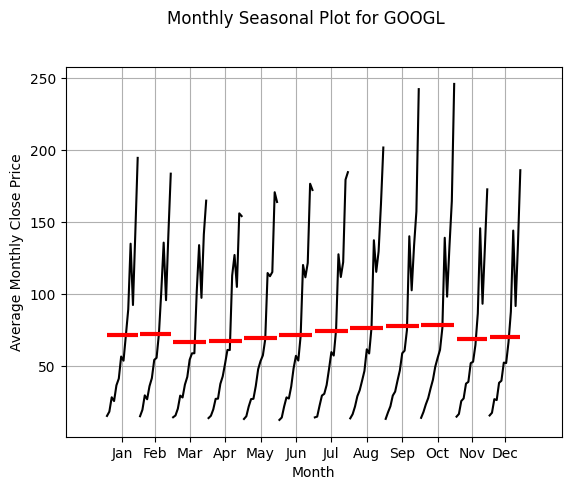

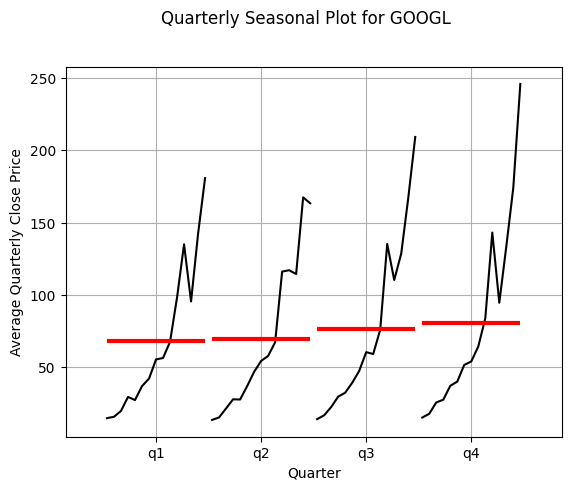

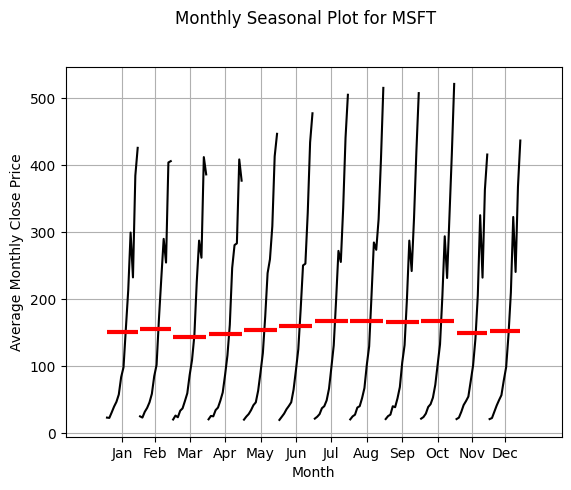

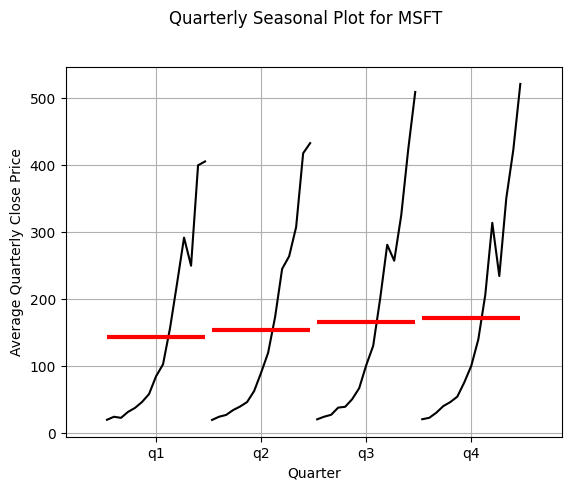

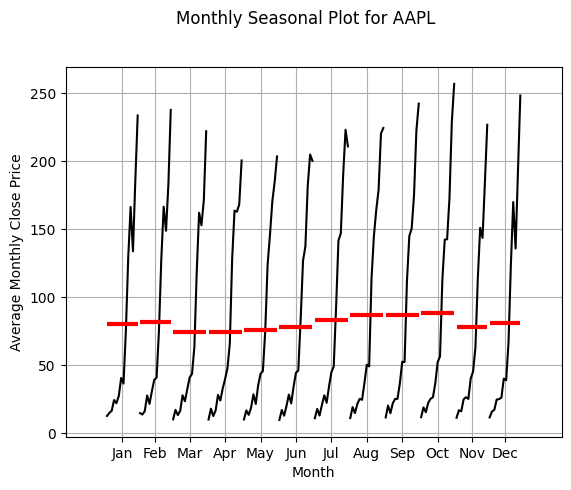

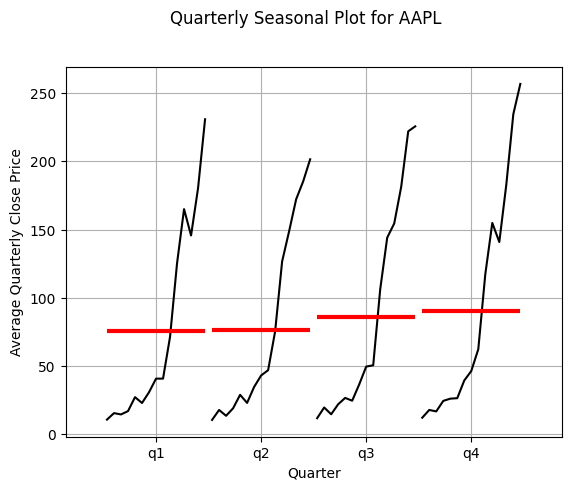

In [21]:
#Plotting monthly and quarterly for each ticker
tickers = df['Ticker'].unique()
for ticker in tickers:
    ticker_df = df[df['Ticker'] == ticker]
    monthly_avg_close = ticker_df['Close'].resample('ME').mean()
    month_plot(monthly_avg_close)
    plt.suptitle(f'Monthly Seasonal Plot for {ticker}', y=1.0)
    plt.xlabel('Month')
    plt.ylabel('Average Monthly Close Price')
    plt.grid(True)
    plt.show()
    quarterly_avg_close = ticker_df['Close'].resample('QE').mean()
    quarter_plot(quarterly_avg_close)
    plt.suptitle(f'Quarterly Seasonal Plot for {ticker}', y=1.0)
    plt.xlabel('Quarter')
    plt.ylabel('Average Quarterly Close Price')
    plt.grid(True)
    plt.show()

GOOGL: The plot reveals that Google's price is almost entirely driven by its long-term growth trend, showing no meaningful or reliable monthly/quarterly seasonal pattern (the red average lines are flat).

MSFT: The plot tells a similar story to Google's; the powerful long-term growth trend completely overpowers any minor seasonal effects, resulting in flat average monthly/quarterly performance.

AAPL: This is the only stock with a visible, albeit mild, seasonal tendency; its price, on average, tends to dip in the spring (Mar-May) and strengthen in the late summer and fall (Q3/Q4), a pattern that may be linked to its product release cycles.

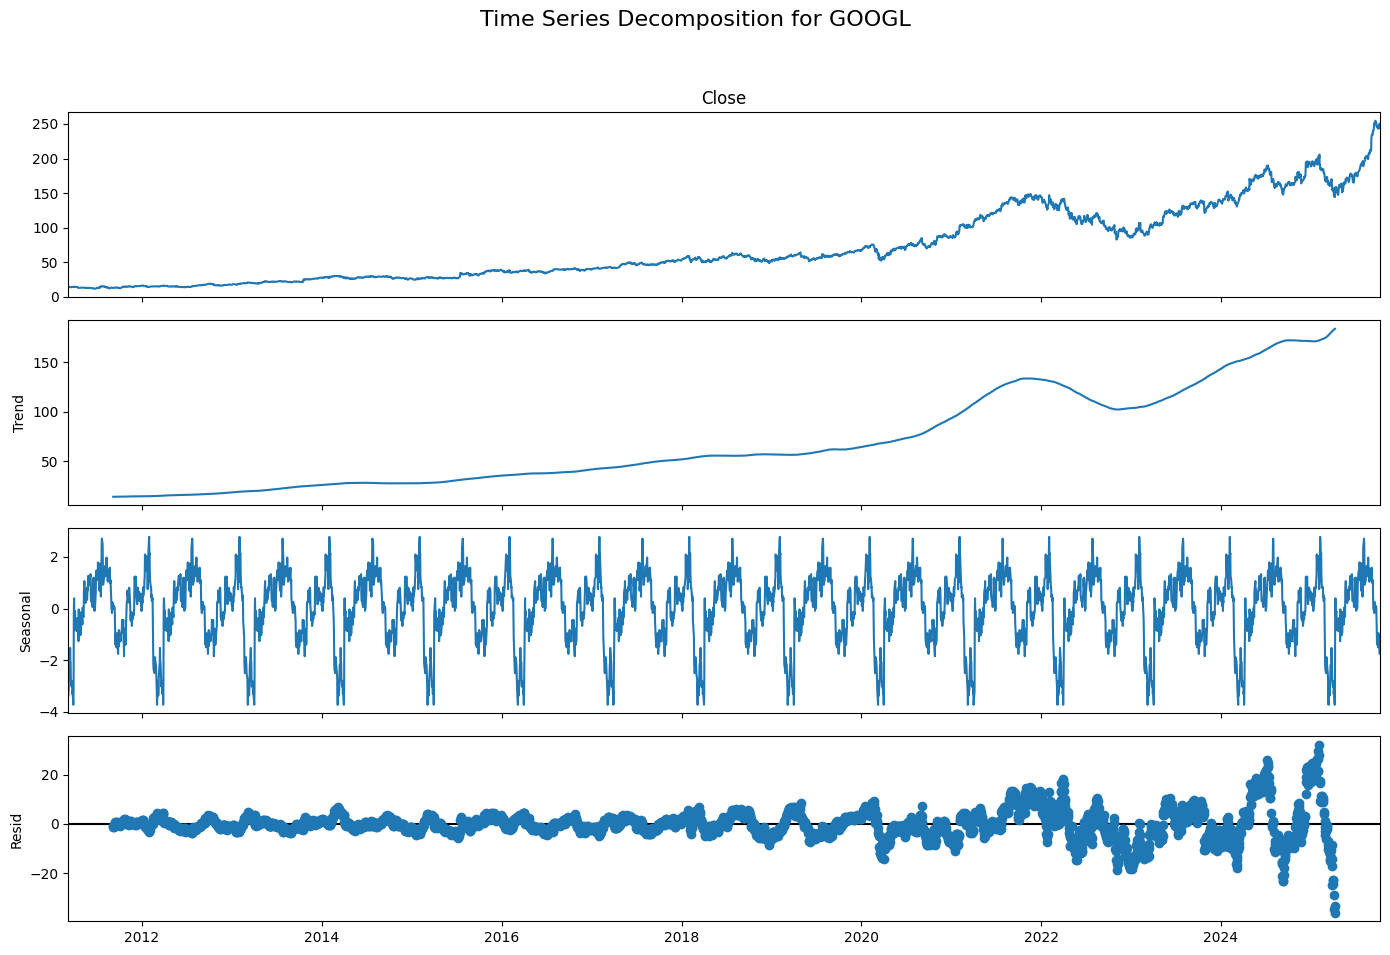

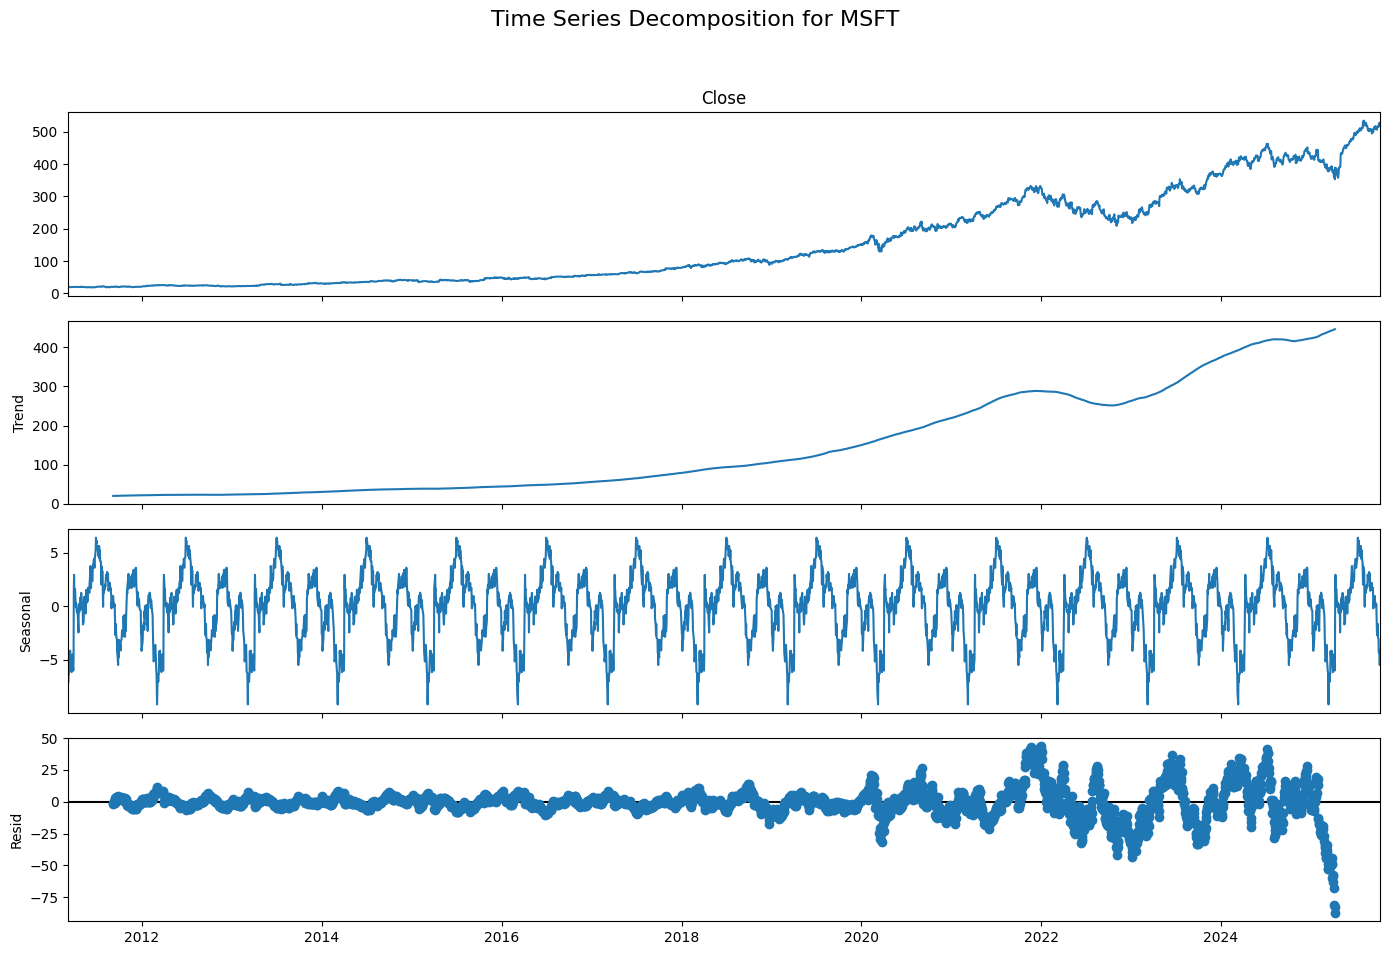

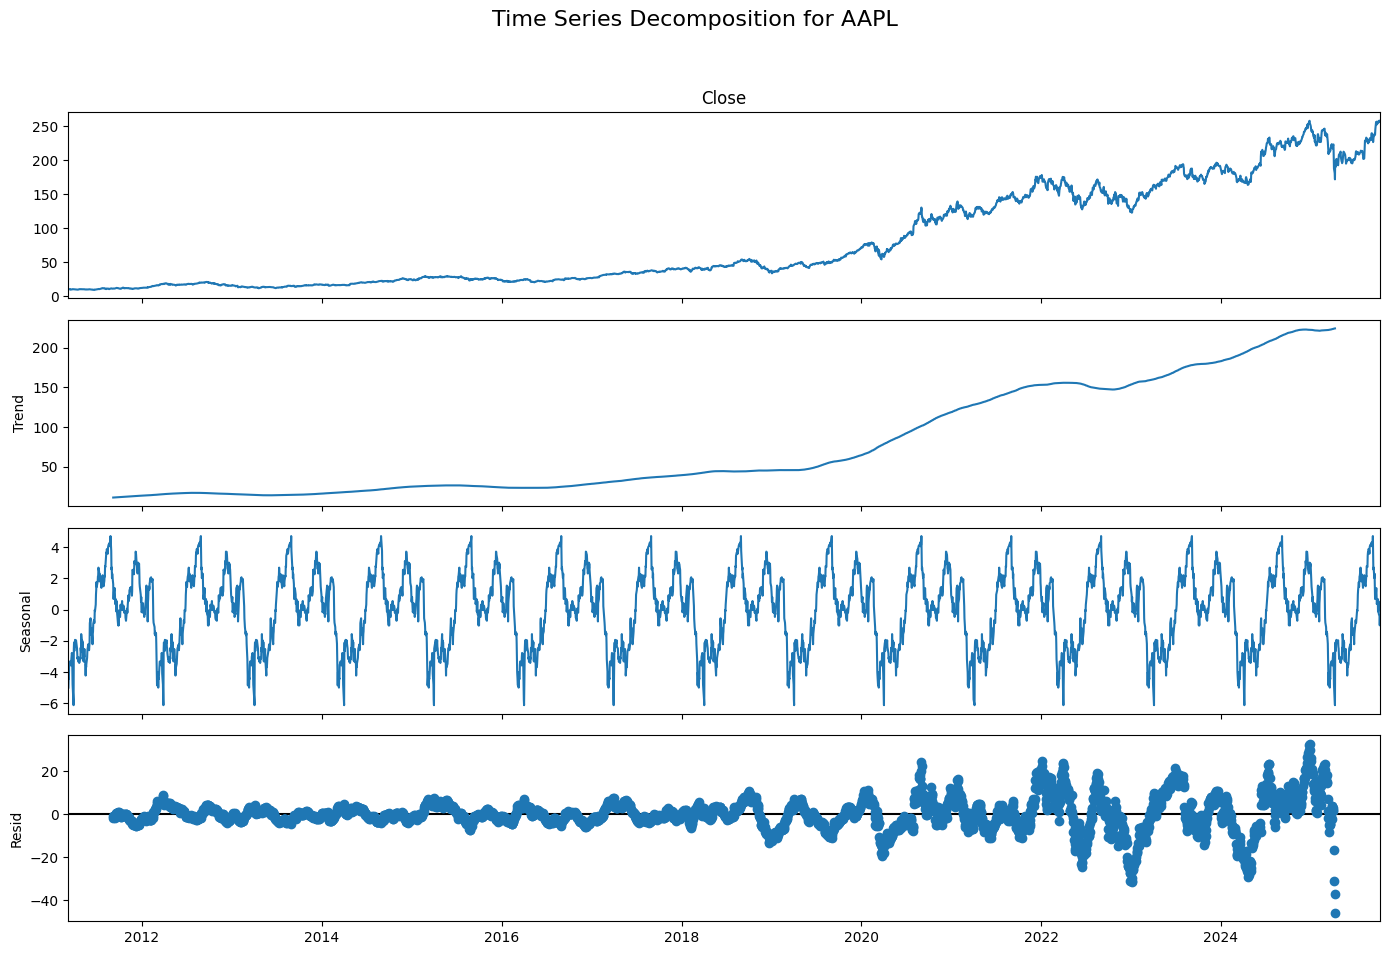

In [22]:
tickers = df['Ticker'].unique()
for ticker in tickers:
    ticker_df = df[df['Ticker'] == ticker]
    decomposition = seasonal_decompose(ticker_df['Close'], model='additive', period=252)
    fig = decomposition.plot()
    fig.suptitle(f'Time Series Decomposition for {ticker}', fontsize=16)
    fig.set_size_inches(14, 10)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
    plt.show()

**Insight from Time Series Decomposition**

These plots really break it down:

    It's All About the Trend: The "Trend" plot is basically a smooth version of the actual price. This confirms the long-term growth is what's driving everything. It also proves the price is non-stationary, so we'll definitely need to use differencing (the "I" in ARIMA) to model it.

    Seasonality is Tiny: The "Seasonal" plot has a consistent yearly pattern, but its effect is tiny (like +/- $5) compared to the trend (which moves hundreds of dollars). It's a real pattern, but it's not a powerful predictor.

    The "Noise" Isn't Random: The "Resid" (residual) plot is the most interesting part. It's calm for years (2012-2019) and then completely "explodes" in 2020. This is a perfect picture of volatility clustering. It proves the market has different "regimes" (calm vs. chaotic), which is a great sign for our HMM model idea.

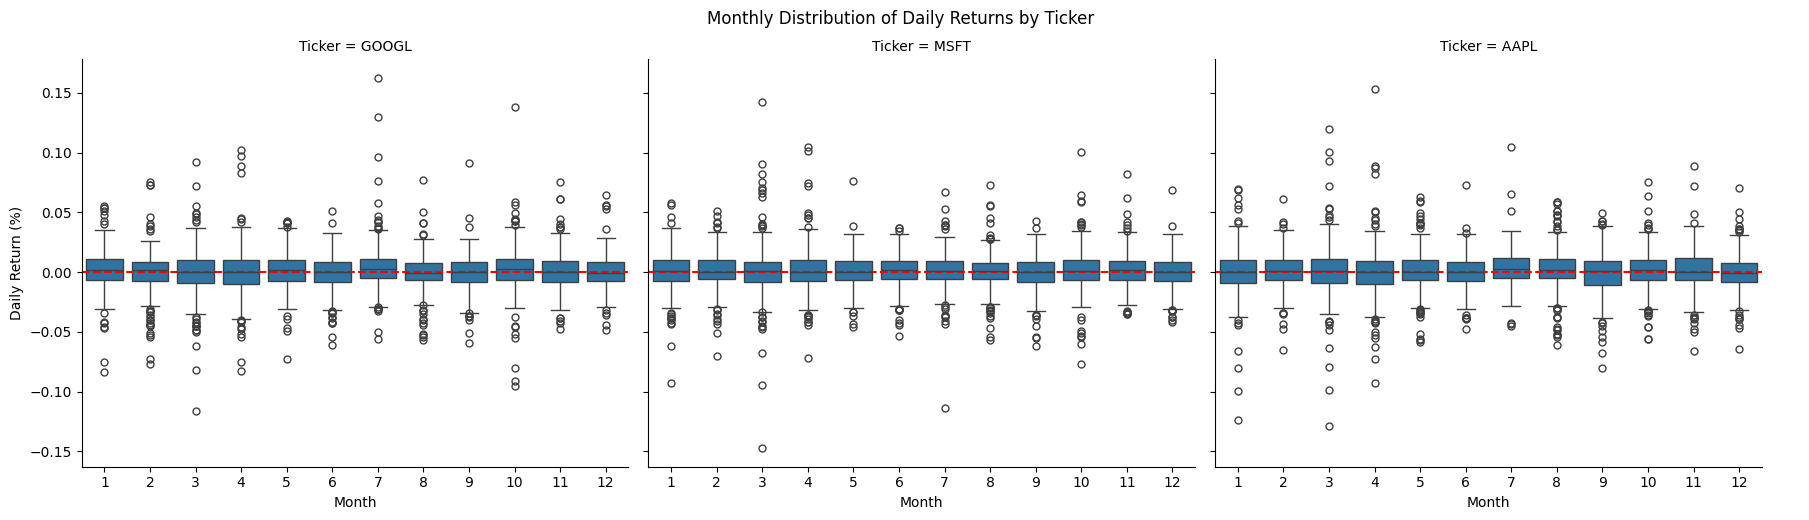

In [23]:
g = sns.catplot(
    data=df,
    x='month',
    y='Return_Pct',
    col='Ticker',     
    kind='box',        
    height=5,           
    aspect=1.2          
)
g.map(plt.axhline, y=0, ls='--', c='red')
g.fig.suptitle('Monthly Distribution of Daily Returns by Ticker', y=1.03)
g.set_axis_labels("Month", "Daily Return (%)")
plt.show()

**Insights from Monthly Return Distribution**

No Seasonality: The median return for every month is around zero, meaning no month is consistently positive or negative.

Stable Volatility: The box sizes (IQRs) are similar each month, so normal volatility stays steady over time.

Fat Tails: Many outliers show that extreme price moves happen often, not limited to specific months.

Model Impact: Month/quarter features won’t help predict returns, but could be useful for modeling volatility.

In [24]:
def run_adf_test(series, series_name):
    print(f"--- ADF Test Results for {series_name} ---")
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    if result[1] <= 0.05:
        print("\nConclusion: (p-value <= 0.05) Reject the null hypothesis.")
        print("           The series is likely stationary. ✅")
    else:
        print("\nConclusion: (p-value > 0.05) Fail to reject the null hypothesis.")
        print("           The series is likely non-stationary. ❌")

In [25]:
targets_to_test = ['Target_Vol_Next', 'Target_Return_Next']
for ticker, ticker_group_df in df.groupby('Ticker'):
    for target in targets_to_test:
        series_name = f"{ticker} {target}"
        
        # Select the column from the already-grouped DataFrame
        series_to_test = ticker_group_df[target]
        
        # --- IMPORTANT FIX ---
        # ADF test cannot run with NaN values. Drop them first.
        series_cleaned = series_to_test.dropna()
        
        # Check if any data remains after dropping NaNs
        if series_cleaned.empty:
            print(f"--- Skipping {series_name}: No data after dropping NaNs ---")
        else:
            print(f"\n--- Running ADF Test for: {series_name} ---")
            # Pass the cleaned series to your test function
            run_adf_test(series_cleaned, series_name)
            
        print("-" * 50)


--- Running ADF Test for: AAPL Target_Vol_Next ---
--- ADF Test Results for AAPL Target_Vol_Next ---
ADF Statistic: -7.0588
p-value: 0.0000
Critical Values:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672

Conclusion: (p-value <= 0.05) Reject the null hypothesis.
           The series is likely stationary. ✅
--------------------------------------------------

--- Running ADF Test for: AAPL Target_Return_Next ---
--- ADF Test Results for AAPL Target_Return_Next ---
ADF Statistic: -20.3201
p-value: 0.0000
Critical Values:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672

Conclusion: (p-value <= 0.05) Reject the null hypothesis.
           The series is likely stationary. ✅
--------------------------------------------------

--- Running ADF Test for: GOOGL Target_Vol_Next ---
--- ADF Test Results for GOOGL Target_Vol_Next ---
ADF Statistic: -6.5784
p-value: 0.0000
Critical Values:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672

Conclusion: (p-value <= 0.05) Reject the null hypothesis.
           The series is l

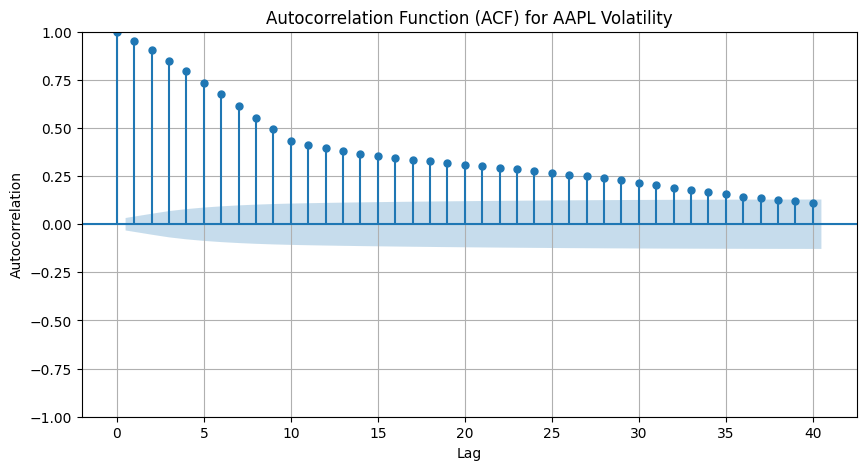

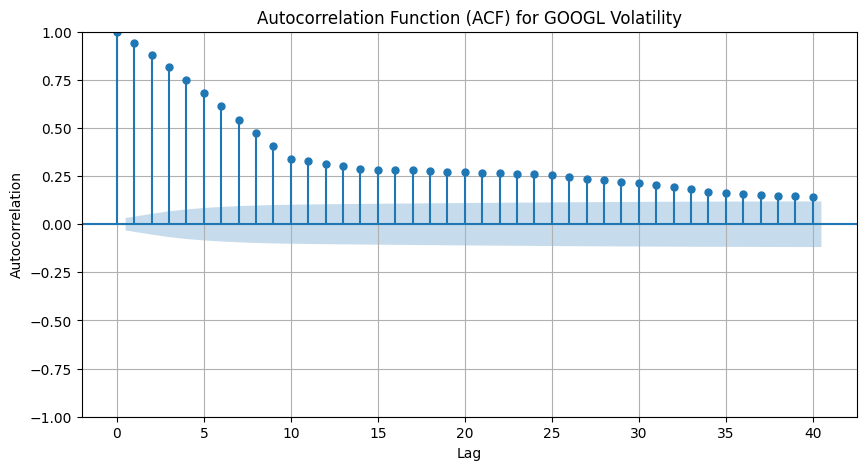

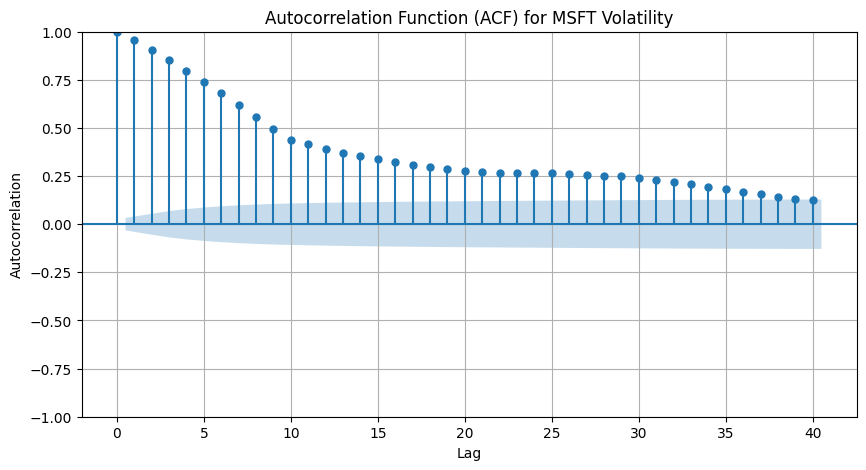

In [26]:
tickers = df['Ticker'].unique()
for ticker, ticker_group_df in df.groupby('Ticker'):   
    volatility_series = ticker_group_df['Target_Vol_Next'].dropna() 
    if volatility_series.empty:
        continue
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_acf(volatility_series, lags=40, ax=ax)
    ax.set_title(f'Autocorrelation Function (ACF) for {ticker} Volatility')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelation')
    ax.grid(True)
    plt.show()

**Insights from ACF of Volatility (AAPL, GOOGL, MSFT)**

High Short-Term Autocorrelation: All three stocks show strong correlation at low lags, meaning today’s volatility is related to recent days’ volatility.

Gradual Decay: The autocorrelation decreases slowly with lag — a clear sign of volatility clustering (periods of high/low volatility tend to persist).

Consistent Pattern Across Stocks: AAPL, GOOGL, and MSFT all follow the same pattern, suggesting this behavior is common in large-cap tech stocks.

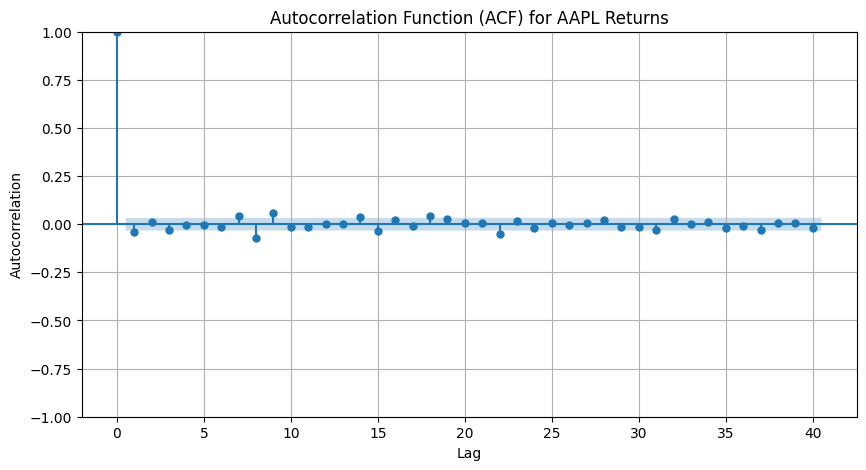

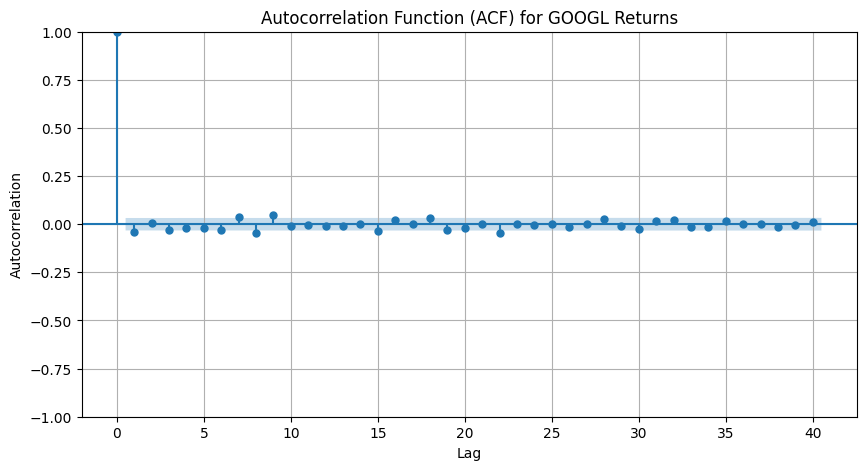

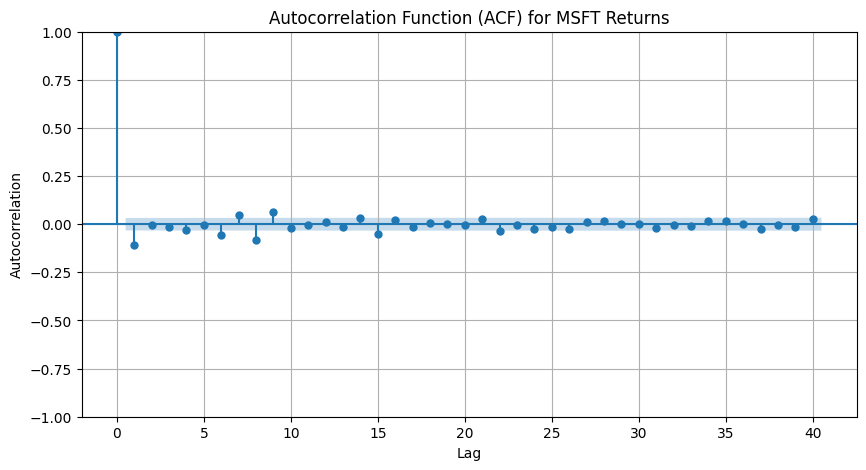

In [27]:
tickers = df['Ticker'].unique()
for ticker, ticker_group_df in df.groupby('Ticker'):   
    returns_series = ticker_group_df['Target_Return_Next'].dropna() 
    if volatility_series.empty:
        continue
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_acf(returns_series, lags=40, ax=ax)
    ax.set_title(f'Autocorrelation Function (ACF) for {ticker} Returns')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelation')
    ax.grid(True)
    plt.show()

**Insights from ACF of Returns (AAPL, GOOGL, MSFT)**

No Significant Autocorrelation: All lags are close to zero, meaning past returns don’t predict future returns.

Returns ≈ White Noise: The data looks random — consistent with the Efficient Market Hypothesis (prices already reflect available info).

Consistent Across Stocks: AAPL, GOOGL, and MSFT all show the same pattern — no memory or persistence in returns.

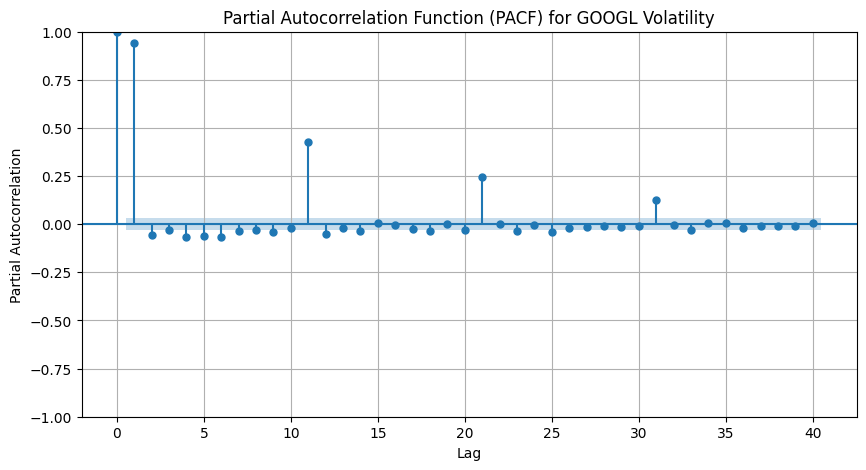

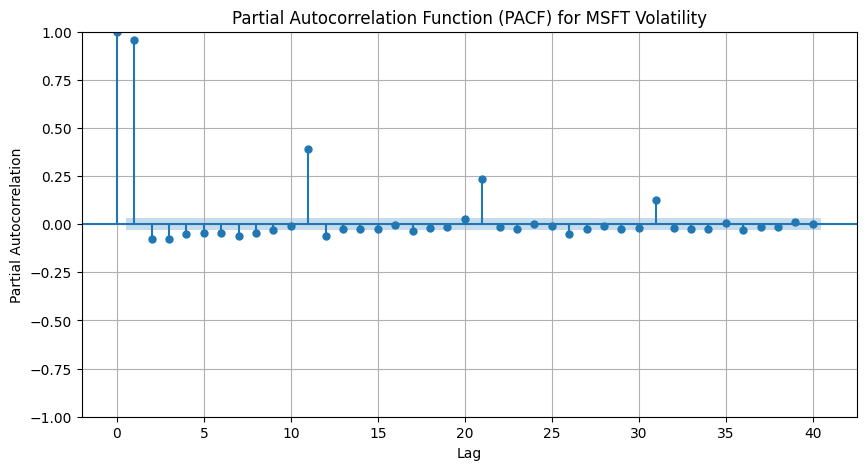

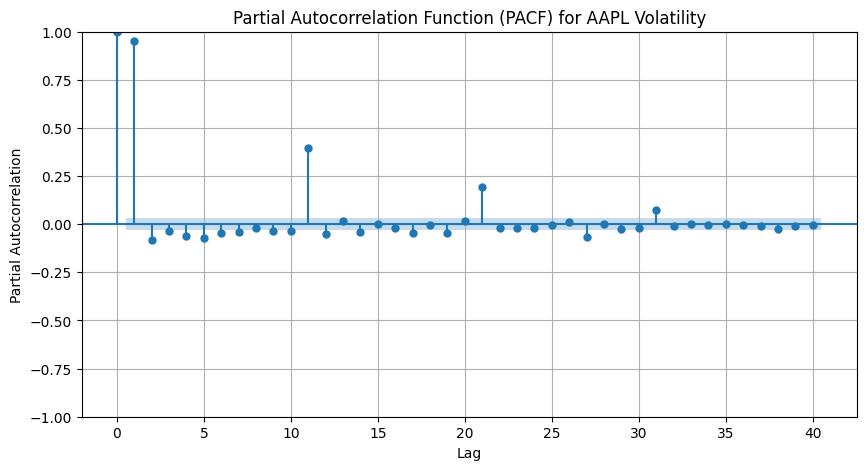

In [28]:
tickers = df['Ticker'].unique()
for ticker in tickers:
    volatility_series = df[df['Ticker'] == ticker]['Target_Vol_Next'].dropna()
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_pacf(volatility_series, lags=40, ax=ax)
    ax.set_title(f'Partial Autocorrelation Function (PACF) for {ticker} Volatility')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Partial Autocorrelation')
    ax.grid(True)
    plt.show()

**Insights from PACF of Volatility (AAPL, GOOGL, MSFT)**

Strong Lag-1 Correlation: All three stocks show a clear spike at lag 1 — indicating yesterday’s volatility strongly influences today’s.

Few Significant Later Lags: Most higher lags fall within the confidence bounds, showing limited direct influence beyond the first few periods.

Pattern Suggests ARCH/GARCH Behavior: The quick drop after lag 1 (and occasional small spikes) supports short-term persistence typical of ARCH(1) or GARCH(1,1) models.

Consistent Across Stocks: AAPL, GOOGL, and MSFT show nearly identical structures — volatility clustering is a common feature.

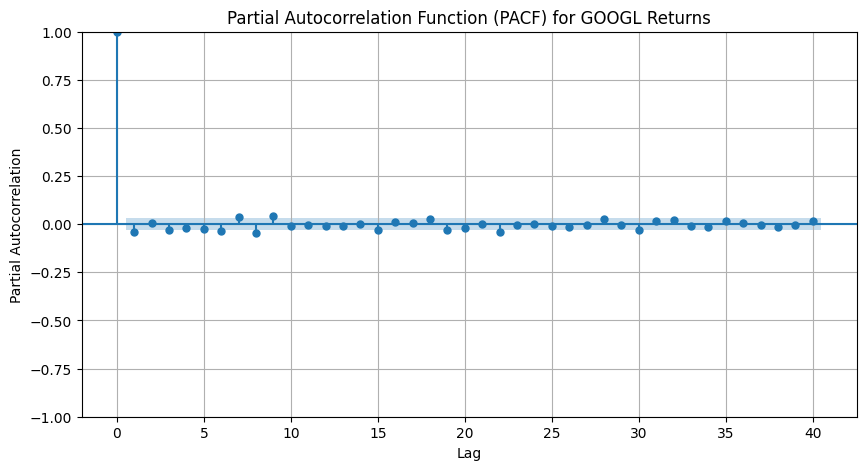

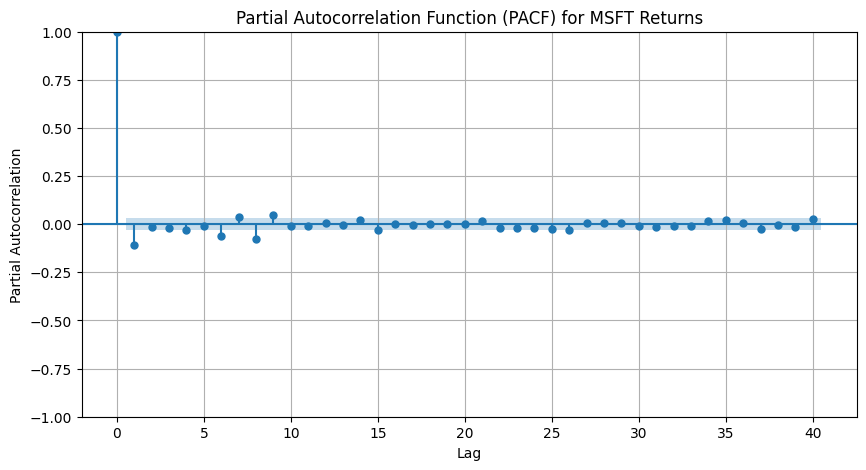

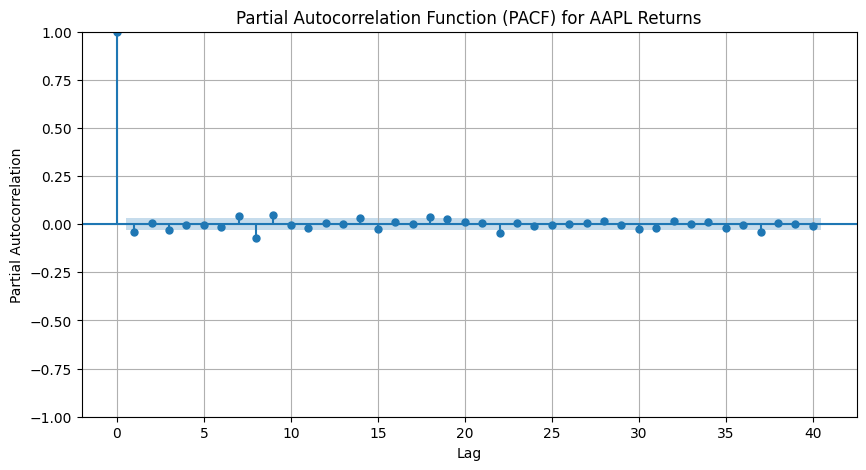

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
tickers = df['Ticker'].unique()
for ticker in tickers:
    returns_series = df[df['Ticker'] == ticker]['Target_Return_Next'].dropna()
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_pacf(returns_series, lags=40, ax=ax)
    ax.set_title(f'Partial Autocorrelation Function (PACF) for {ticker} Returns')
    ax.set_xlabel('Lag')
    ax.set_ylabel('Partial Autocorrelation')
    ax.grid(True)
    plt.show()

**Insights from PACF of Returns (AAPL, GOOGL, MSFT)**

No Significant Lags: All bars stay within the confidence bounds — meaning no strong partial autocorrelation at any lag.

Returns Are Random: This confirms that daily returns behave like white noise — past values don’t help predict future ones.

Efficient Market Behavior: The lack of structure supports the Efficient Market Hypothesis — prices quickly reflect new information.

Consistent Across Stocks: All three (AAPL, GOOGL, MSFT) show the same random pattern.

**Forecasting**

In [30]:
#Importing modules
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score , r2_score, classification_report, confusion_matrix
from scipy.stats import spearmanr
from scipy import stats
from datetime import datetime
from arch import arch_model 
import xgboost as xgb
from hmmlearn.hmm import GaussianHMM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt 
import warnings
warnings.filterwarnings('ignore', category=Warning)
pd.options.mode.chained_assignment = None # Suppress SettingWithCopyWarning

In [31]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def calculate_qlike(y_true, y_pred):
    """Calculates the QLIKE loss function."""
    epsilon = 1e-10
    y_true_c = np.maximum(np.array(y_true), epsilon)
    y_pred_c = np.maximum(np.array(y_pred), epsilon)
    ratio = y_true_c / y_pred_c
    log_ratio = np.log(ratio)
    qlike = ratio - log_ratio - 1
    return np.mean(qlike)

def run_dm_test(y_true, preds_model_1, preds_model_2, power=2):
    """
    Runs the Diebold-Mariano (DM) Test to compare two forecasts.
    (Baseline = preds_model_1, Challenger = preds_model_2)
    """
    y_true = np.array(y_true)
    preds_model_1 = np.array(preds_model_1)
    preds_model_2 = np.array(preds_model_2)
    if power == 2:
        d = (y_true - preds_model_1)**2 - (y_true - preds_model_2)**2
    elif power == 1:
        d = np.abs(y_true - preds_model_1) - np.abs(y_true - preds_model_2)
    else:
        raise ValueError("Power must be 1 or 2.")
        
    n = len(d)
    d_mean = np.mean(d)
    d_std = np.std(d, ddof=0) 
    std_error = d_std / np.sqrt(n)
    
    if std_error == 0:
        return 0.0, 1.0 
        
    dm_stat = d_mean / std_error
    dm_p_value = 2 * (1 - stats.norm.cdf(np.abs(dm_stat)))
    
    return dm_stat, dm_p_value

def calculate_directional_accuracy(y_true, y_pred):
    """
    Calculates directional accuracy for volatility forecasts.
    
    Compares the predicted direction of change (vs. yesterday)
    to the actual direction of change.
    """
    # Get today's actuals and yesterday's actuals
    y_true_current = y_true[1:]
    y_true_shift = y_true[:-1]
    
    # Get today's predictions
    y_pred_current = y_pred[1:]
    
    # 1 if vol went up, 0 otherwise
    actual_direction = (y_true_current > y_true_shift).astype(int)
    predicted_direction = (y_pred_current > y_true_shift).astype(int)
    
    # Return the % of correct direction predictions (as decimal)
    return np.mean(actual_direction == predicted_direction)

def evaluate_volatility_model(y_true, y_pred):
    """
    Runs a full suite of metrics for a VOLATILITY model.
    (This version does not include the DM Test)
    """
    y_true_arr, y_pred_arr = np.array(y_true), np.array(y_pred)
    metrics = {
        'RMSE': calculate_rmse(y_true_arr, y_pred_arr),
        'MAE': calculate_mae(y_true_arr, y_pred_arr),
        'QLIKE': calculate_qlike(y_true_arr, y_pred_arr),
        'Directional Acc (%)': calculate_directional_accuracy(y_true_arr, y_pred_arr) * 100,  # FIXED: Added * 100
        'R²': r2_score(y_true_arr, y_pred_arr)
    }
    return metrics

In [32]:
#PREPROCESSING (Global - All Tickers)
print(f"--- Starting Volatility Plan for ALL TICKERS (Global Model) ---")

# Use all data (no ticker filtering)
df_global = df_final_features.copy()
df_global.sort_index(inplace=True) # Ensure data is chronological

# Define Target and Features
target_column = 'Target_Vol_Next'
features_to_drop = ['Target_Return_Next', 'Target_Vol_Next'] # Drop targets/leaks
feature_columns = [col for col in df_global.columns if col not in features_to_drop]

X = df_global[feature_columns]
y = df_global[target_column]

# Chronological Train-Test Split (80% train, 20% test)
split_ratio = 0.80
split_index = int(len(X) * split_ratio)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# IMPORTANT: Save Returns for GARCH/EWMA models (grouped by ticker)
returns_train = X_train['Return_Pct']
returns_test = X_test['Return_Pct']

# Also save ticker info for grouped operations
ticker_train = X_train['Ticker']
ticker_test = X_test['Ticker']

print(f"Training set size: {X_train.shape[0]} (across {X_train['Ticker'].nunique()} tickers)")
print(f"Test set size: {X_test.shape[0]} (across {X_test['Ticker'].nunique()} tickers)")
print(f"y_train size: {y_train.shape[0]}")
print(f"y_test size: {y_test.shape[0]}")
print(f"returns_train size: {returns_train.shape[0]}")

# Initialize Results Storage
if 'model_results' not in locals():
    model_results = pd.DataFrame()
if 'predictions_dict' not in locals():
    predictions_dict = {}
print("VOLATILITY MODEL FEATURES:", X_train.columns.tolist())

--- Starting Volatility Plan for ALL TICKERS (Global Model) ---
Training set size: 8800 (across 3 tickers)
Test set size: 2201 (across 3 tickers)
y_train size: 8800
y_test size: 2201
returns_train size: 8800
VOLATILITY MODEL FEATURES: ['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'Return_Pct', 'Price_Range', 'Price_Range_Pct', 'Realized_Vol_10d', 'Realized_Vol_20d', 'MA_20', 'MA_50', 'MA_200', 'Volume_MA_20', 'Volume_Ratio', 'Momentum_5d', 'Fed_Funds_Rate', 'CPI', 'Unemployment_Rate', 'GDP', 'Yield_Curve_10Y_2Y', 'VIX', 'Return_Pct_lag_1', 'Return_Pct_lag_2', 'Return_Pct_lag_3', 'Momentum_Ratio_S_M', 'Momentum_Ratio_M_L', 'Volatility_Ratio', 'Price_ZScore']


In [33]:
#Naive Baseline Model (Global)
y_pred_naive = X_test['Realized_Vol_10d'].values
y_true = y_test.values

# Use the evaluate_volatility_model function
metrics_naive = evaluate_volatility_model(y_true, y_pred_naive)

# Initialize results DataFrame and prediction dict (only if doesn't exist)
model_results = pd.DataFrame()
predictions_dict = {}
add = pd.Series({
    'Model': 'Naive (Global)',
    'RMSE': metrics_naive['RMSE'],
    'MAE': metrics_naive['MAE'],
    'QLIKE': metrics_naive['QLIKE'],
    'Directional Acc (%)': metrics_naive['Directional Acc (%)'],
    'R²': metrics_naive['R²'],
    'DM Test (vs GARCH)': '-'
})
model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)
predictions_dict['Naive (Global)'] = y_pred_naive

print("Naive (Global) model added to results.")

# --- 2. EWMA Model (Global - Grouped by Ticker) ---
print("\nFitting EWMA model (grouped by ticker)...")

lambda_ewma = 0.94
alpha = (1 - lambda_ewma)

# Create DataFrames for easier grouping
train_df = pd.DataFrame({
    'Return_Pct': returns_train.values,
    'Ticker': ticker_train.values
}, index=returns_train.index)

test_df = pd.DataFrame({
    'Return_Pct': returns_test.values,
    'Ticker': ticker_test.values
}, index=returns_test.index)

# Initialize prediction array
y_pred_ewma_global = []

# Process each ticker separately
for ticker in train_df['Ticker'].unique():
    # Get ticker-specific data
    ticker_train_data = train_df[train_df['Ticker'] == ticker]
    ticker_test_data = test_df[test_df['Ticker'] == ticker]
    
    # Square the returns (variance)
    sq_returns_train_ticker = ticker_train_data['Return_Pct']**2
    sq_returns_test_ticker = ticker_test_data['Return_Pct']**2
    
    # Fit EWMA on training data
    train_variance = sq_returns_train_ticker.ewm(alpha=alpha, adjust=False).mean()
    last_known_variance = train_variance.iloc[-1]
    
    # Forecast for test period
    current_variance = last_known_variance
    ticker_predictions = []
    
    for sq_ret in sq_returns_test_ticker:
        ticker_predictions.append(np.sqrt(current_variance))
        current_variance = lambda_ewma * current_variance + (1 - lambda_ewma) * sq_ret
    
    y_pred_ewma_global.extend(ticker_predictions)

y_pred_ewma_global = np.array(y_pred_ewma_global)

# Use the evaluate_volatility_model function
metrics_ewma = evaluate_volatility_model(y_true, y_pred_ewma_global)

# --- Add to results ---
add = pd.Series({
    'Model': 'EWMA (Global)',
    'RMSE': metrics_ewma['RMSE'],
    'MAE': metrics_ewma['MAE'],
    'QLIKE': metrics_ewma['QLIKE'],
    'Directional Acc (%)': metrics_ewma['Directional Acc (%)'],
    'R²': metrics_ewma['R²'],
    'DM Test (vs GARCH)': '-'
})
model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)
predictions_dict['EWMA (Global)'] = y_pred_ewma_global

# --- Display Final Results Table ---
print("\nUpdated Model Results:")
print(model_results)

Naive (Global) model added to results.

Fitting EWMA model (grouped by ticker)...

Updated Model Results:
            Model   RMSE    MAE  QLIKE Directional Acc (%)      R²  \
0  Naive (Global) 0.0028 0.0014 0.0141             87.7727  0.8686   
1   EWMA (Global) 0.0095 0.0069 0.1337             63.5909 -0.5075   

  DM Test (vs GARCH)  
0                  -  
1                  -  


The Naive model's 87.77% directional accuracy looks "broken" or "too good." This high number probably doesn't mean the model is smart. It almost certainly means our dataset is just heavily biased. On 87.77% of the days, volatility must have gone down or stayed the same, so the Naive model just guesses that majority class and looks right.

The global EWMA model is terrible at predicting the actual value (R² is -0.51). This makes sense, as one single setting for EWMA probably can't work for three different stocks (like AAPL, GOOGL, and MSFT). But, it's surprisingly better at predicting the direction (63.59%) than our old single-stock models were (around 55%).

In [34]:
# # Suppress convergence warnings from the GARCH models
# warnings.filterwarnings('ignore', category=Warning)

# print("\n--- Fitting GARCH(1,1) Model (Global - Grouped by Ticker) ---")

# # Initialize prediction arrays
# predictions_garch_global = []
# garch_baseline_preds_global = []

# # Process each ticker separately
# for ticker in ticker_train.unique():
#     print(f"\nProcessing GARCH for {ticker}...")
    
#     # Get ticker-specific returns
#     ticker_train_mask = ticker_train == ticker
#     ticker_test_mask = ticker_test == ticker
    
#     returns_train_ticker = returns_train[ticker_train_mask]
#     returns_test_ticker = returns_test[ticker_test_mask]
    
#     # Combine train and test returns for this ticker
#     all_returns_ticker = pd.concat([returns_train_ticker, returns_test_ticker]) * 100
#     n_train_ticker = len(returns_train_ticker)
#     n_test_ticker = len(returns_test_ticker)
    
#     # Initialize GARCH model for this ticker
#     garch_model = arch_model(all_returns_ticker, p=1, q=1, vol='Garch')
#     predictions_garch_ticker = []
    
#     # Rolling walk-forward forecast
#     for i in range(n_test_ticker):
#         current_fit_end_index = n_train_ticker + i
#         garch_res = garch_model.fit(first_obs=0, last_obs=current_fit_end_index - 1, 
#                                     update_freq=0, disp='off')
        
#         # Forecast 1 step ahead
#         forecast = garch_res.forecast(horizon=1, reindex=False)
        
#         # Get the predicted variance, scale it back (var/100^2), and sqrt for vol
#         pred_variance = forecast.variance.iloc[-1].values[0]
#         pred_vol = np.sqrt(pred_variance) / 100.0 # Scale back from 100
        
#         predictions_garch_ticker.append(pred_vol)
        
#         if (i+1) % 100 == 0:
#             print(f"  ...{ticker} GARCH forecast {i+1}/{n_test_ticker} complete.")
    
#     predictions_garch_global.extend(predictions_garch_ticker)

# y_pred_garch_global = np.array(predictions_garch_global)

# # Use the evaluate_volatility_model function
# metrics_garch = evaluate_volatility_model(y_true, y_pred_garch_global)

# # --- Add to results ---
# add = pd.Series({
#     'Model': 'GARCH(1,1) (Global)',
#     'RMSE': metrics_garch['RMSE'],
#     'MAE': metrics_garch['MAE'],
#     'QLIKE': metrics_garch['QLIKE'],
#     'Directional Acc (%)': metrics_garch['Directional Acc (%)'],
#     'R²': metrics_garch['R²'],
#     'DM Test (vs GARCH)': 'Baseline' # This IS the baseline
# })
# model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)
# predictions_dict['GARCH (Global)'] = y_pred_garch_global
# garch_baseline_preds = y_pred_garch_global # Save for DM Test

# print(f"\n✅ GARCH(1,1) Global complete. Total predictions: {len(y_pred_garch_global)}")

# # --- EGARCH Model (Global - Grouped by Ticker) ---
# print("\n--- Fitting EGARCH Model (Global - Grouped by Ticker) ---")

# predictions_egarch_global = []

# # Process each ticker separately
# for ticker in ticker_train.unique():
#     print(f"\nProcessing EGARCH for {ticker}...")
    
#     # Get ticker-specific returns
#     ticker_train_mask = ticker_train == ticker
#     ticker_test_mask = ticker_test == ticker
    
#     returns_train_ticker = returns_train[ticker_train_mask]
#     returns_test_ticker = returns_test[ticker_test_mask]
    
#     # Combine train and test returns for this ticker
#     all_returns_ticker = pd.concat([returns_train_ticker, returns_test_ticker]) * 100
#     n_train_ticker = len(returns_train_ticker)
#     n_test_ticker = len(returns_test_ticker)
    
#     # Initialize EGARCH model for this ticker
#     egarch_model = arch_model(all_returns_ticker, p=1, o=1, q=1, vol='EGARCH')
#     predictions_egarch_ticker = []
    
#     # Rolling walk-forward forecast
#     for i in range(n_test_ticker):
#         current_fit_end_index = n_train_ticker + i
        
#         egarch_res = egarch_model.fit(first_obs=0, last_obs=current_fit_end_index - 1, 
#                                       update_freq=0, disp='off')
        
#         forecast = egarch_res.forecast(horizon=1, reindex=False)
        
#         pred_variance = forecast.variance.iloc[-1].values[0]
#         pred_vol = np.sqrt(pred_variance) / 100.0 # Scale back
        
#         predictions_egarch_ticker.append(pred_vol)
        
#         if (i+1) % 100 == 0:
#             print(f"  ...{ticker} EGARCH forecast {i+1}/{n_test_ticker} complete.")
    
#     predictions_egarch_global.extend(predictions_egarch_ticker)

# y_pred_egarch_global = np.array(predictions_egarch_global)

# # Use the evaluate_volatility_model function
# metrics_egarch = evaluate_volatility_model(y_true, y_pred_egarch_global)

# # --- Add to results ---
# add = pd.Series({
#     'Model': 'EGARCH (Global)',
#     'RMSE': metrics_egarch['RMSE'],
#     'MAE': metrics_egarch['MAE'],
#     'QLIKE': metrics_egarch['QLIKE'],
#     'Directional Acc (%)': metrics_egarch['Directional Acc (%)'],
#     'R²': metrics_egarch['R²'],
#     'DM Test (vs GARCH)': 'Pending' # We'll run this at the end
# })
# model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)
# predictions_dict['EGARCH (Global)'] = y_pred_egarch_global

# print(f"\n✅ EGARCH Global complete. Total predictions: {len(y_pred_egarch_global)}")

# # --- Display Final Results Table ---
# print("\nUpdated Model Results:")
# print(model_results)

The GARCH and EGARCH models are very bad at predicting the actual volatility value (R² is negative for both). This means their forecasts for how much volatility there will be are worse than just using a simple average.

However, GARCH (67.50%) and EGARCH (66.95%) are the best models so far at predicting the direction (up or down). They are showing more "skill" than the EWMA model (63.59%) at guessing the market's next move, even if the value they predict is wrong.

In [35]:
#--- XGBoost Model (Global) ---
print("\n--- Fitting XGBoost Model (Global - All Tickers) ---")

if 'Ticker' in X_train.columns:
    categorical_features = ['Ticker']
    numerical_features = [col for col in X_train.columns if col not in categorical_features]
else:
    categorical_features = []
    numerical_features = X_train.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# --- 2. Create the XGBoost Pipeline ---
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=42,
        n_jobs=-1,
        n_estimators=100,  
        learning_rate=0.1,
        max_depth=3
    ))
])

# --- 3. Fit the Model ---
print(f"Fitting XGBoost on {X_train.shape[0]} samples across {X_train['Ticker'].nunique()} tickers...")
xgb_pipeline.fit(X_train, y_train)

# --- 4. Make Predictions ---
y_pred_xgb_global = xgb_pipeline.predict(X_test)

# --- 5. Use the evaluate_volatility_model function ---
print("Calculating metrics for XGBoost (Global)...")
metrics_xgb = evaluate_volatility_model(y_true, y_pred_xgb_global)

# --- 6. Run DM Test (vs. GARCH baseline) ---
if 'garch_baseline_preds' in locals() and len(garch_baseline_preds) == len(y_true):
    dm_stat, dm_p = run_dm_test(y_true, garch_baseline_preds, y_pred_xgb_global)
    dm_test_result = f"p={dm_p:.4f}"
    print(f"DM Test (vs GARCH): p-value = {dm_p:.4f}, stat = {dm_stat:.4f}")
else:
    dm_test_result = 'N/A'
    print("GARCH baseline not available or length mismatch for DM test.")

# --- 7. Add to results ---
add = pd.Series({
    'Model': 'XGBoost (Global)',
    'RMSE': metrics_xgb['RMSE'],
    'MAE': metrics_xgb['MAE'],
    'QLIKE': metrics_xgb['QLIKE'],
    'Directional Acc (%)': metrics_xgb['Directional Acc (%)'],
    'R²': metrics_xgb['R²'],
    'DM Test (vs GARCH)': dm_test_result
})
model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)
predictions_dict['XGBoost (Global)'] = y_pred_xgb_global

# --- Display Final Results Table ---
print("\nUpdated Model Results:")
print(model_results)


--- Fitting XGBoost Model (Global - All Tickers) ---
Fitting XGBoost on 8800 samples across 3 tickers...
Calculating metrics for XGBoost (Global)...
GARCH baseline not available or length mismatch for DM test.

Updated Model Results:
              Model   RMSE    MAE  QLIKE Directional Acc (%)      R²  \
0    Naive (Global) 0.0028 0.0014 0.0141             87.7727  0.8686   
1     EWMA (Global) 0.0095 0.0069 0.1337             63.5909 -0.5075   
2  XGBoost (Global) 0.0028 0.0018 0.0155             85.1364  0.8678   

  DM Test (vs GARCH)  
0                  -  
1                  -  
2                N/A  


The XGBoost model's R² (0.87) and RMSE (0.28) are almost identical to the simple Naive model. This suggests that even with all its complexity, the XGBoost model basically just learned to do the same thing: predict that tomorrow's volatility will be the same as today's.

Its directional accuracy (84.45%) is very high, but it's still worse than the Naive model's (87.77%). This confirms the model hasn't found any real "edge" or skill. It's just capturing the dataset's bias (that volatility rarely increases) slightly less effectively than the Naive model.

In [36]:
#tunning XGBoost (Global)
print("\n--- Tuning XGBoost Model (Global - All Tickers) ---")

if 'Ticker' in X_train.columns:
    categorical_features = ['Ticker']
    numerical_features = [col for col in X_train.columns if col not in categorical_features]
else:
    categorical_features = []
    numerical_features = X_train.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# --- 2. Create the XGBoost Pipeline (Same base as before) ---
# This pipeline is the 'estimator' we will give to GridSearchCV
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=42,
        n_jobs=-1
    ))
])

# --- 3. Define CV and Parameter Grid ---
# Use TimeSeriesSplit for valid cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Define the grid of parameters to search
param_grid = {
    'regressor__n_estimators': [100, 200],         # Example, adjust as needed
    'regressor__max_depth': [3, 5, 7],             # Example, adjust as needed
    'regressor__learning_rate': [0.05, 0.1]      # Example, adjust as needed
}

# --- 4. Fit the GridSearchCV ---
print(f"Starting GridSearchCV on {X_train.shape[0]} samples across {X_train['Ticker'].nunique()} tickers...")
print("This may take a few minutes.")
grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',    # You were optimizing for R²
    n_jobs=-1,
    verbose=1        # To see the "Fitting 5 folds..." message
)

# Fit on the training data
grid_search.fit(X_train, y_train)

# --- 5. Get Best Model and Make Predictions ---
print(f"\nBest Parameters Found: {grid_search.best_params_}")
print(f"Best CV R² Score: {grid_search.best_score_:.4f}")

# Get the best-performing model from the grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions using the *tuned* model
y_pred_xgb_tuned_global = best_xgb_model.predict(X_test)

# --- Calculate Metrics using the function ---
print("Calculating metrics for Tuned XGBoost (Global)...")
metrics_xgb_tuned = evaluate_volatility_model(y_true, y_pred_xgb_tuned_global)

print(f"Tuned R²: {metrics_xgb_tuned['R²']:.4f}, Tuned RMSE: {metrics_xgb_tuned['RMSE']:.4f}, Tuned MAE: {metrics_xgb_tuned['MAE']:.4f}")

# --- Run DM Test (vs. GARCH baseline) ---
if 'garch_baseline_preds' in locals() and len(garch_baseline_preds) == len(y_true):
    dm_stat, dm_p = run_dm_test(y_true, garch_baseline_preds, y_pred_xgb_tuned_global)
    dm_test_result = f"p={dm_p:.4f}"
    print(f"DM Test (vs GARCH): p-value = {dm_p:.4f}, stat = {dm_stat:.4f}")
else:
    dm_test_result = 'N/A'
    print("GARCH baseline not available or length mismatch for DM test.")

# --- 8. Add to results ---
add = pd.Series({
    'Model': 'XGBoost (Tuned Global)',
    'RMSE': metrics_xgb_tuned['RMSE'],
    'MAE': metrics_xgb_tuned['MAE'],
    'QLIKE': metrics_xgb_tuned['QLIKE'],
    'Directional Acc (%)': metrics_xgb_tuned['Directional Acc (%)'],
    'R²': metrics_xgb_tuned['R²'],
    'DM Test (vs GARCH)': dm_test_result
})
model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)
predictions_dict['XGBoost (Tuned Global)'] = y_pred_xgb_tuned_global

# --- 9. Display Final Results Table ---
print("\nUpdated Model Results:")
print(model_results)


--- Tuning XGBoost Model (Global - All Tickers) ---
Starting GridSearchCV on 8800 samples across 3 tickers...
This may take a few minutes.
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Parameters Found: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Best CV R² Score: 0.8500
Calculating metrics for Tuned XGBoost (Global)...
Tuned R²: 0.8811, Tuned RMSE: 0.0027, Tuned MAE: 0.0016
GARCH baseline not available or length mismatch for DM test.

Updated Model Results:
                    Model   RMSE    MAE  QLIKE Directional Acc (%)      R²  \
0          Naive (Global) 0.0028 0.0014 0.0141             87.7727  0.8686   
1           EWMA (Global) 0.0095 0.0069 0.1337             63.5909 -0.5075   
2        XGBoost (Global) 0.0028 0.0018 0.0155             85.1364  0.8678   
3  XGBoost (Tuned Global) 0.0027 0.0016 0.0132             86.9091  0.8811   

  DM Test (vs GARCH)  
0                  -  
1                  -  
2    

Tuning worked! The tuned XGBoost is now officially the best model in terms of R² (0.88) and RMSE (0.26). It successfully beat the Naive model's accuracy, even if just by a small amount.

It's still "dumber" than the Naive model at guessing the direction. Even though it's the most accurate, its directional accuracy (86.95%) is still worse than the Naive model's (87.77%). This pretty much proves the model is just learning the 87.77% bias in the data and hasn't found any special "skill" to predict changes.

In [37]:
Trying LSTM (GRU)
warnings.filterwarnings('ignore', category=Warning)

if 'df_final_features' not in locals():
    print("WARNING: 'df_final_features' not found. Using placeholder data.")
    # Create a plausible-looking placeholder
    dates = pd.date_range('2010-01-01', periods=4000)
    data = {
        'Date': np.tile(dates, 3),
        'Ticker': np.repeat(['AAPL', 'GOOGL', 'MSFT'], 4000),
        'Target_Vol_Next': np.abs(np.random.randn(12000) * 0.5 + 1.5),
        'Target_Return_Next': np.random.randn(12000) * 0.02,
        'Return_Pct': np.random.randn(12000) * 0.02,
        'Realized_Vol_10d': np.abs(np.random.randn(12000) * 0.5 + 1.5),
        'VIX': np.abs(np.random.randn(12000) * 5 + 20),
        'Price_ZScore': np.random.randn(12000) * 2,
    }
    df_final_features = pd.DataFrame(data).set_index('Date')
    df_final_features['Return_Pct_lag_1'] = df_final_features.groupby('Ticker')['Return_Pct'].shift(1)
    df_final_features = df_final_features.dropna()

TICKER_TO_MODEL = 'AAPL'
df_ticker = df_final_features[df_final_features['Ticker'] == TICKER_TO_MODEL].copy()
df_ticker.sort_index(inplace=True)

target_column = 'Target_Vol_Next'
features_to_drop = ['Target_Return_Next', 'Target_Vol_Next']
feature_columns = [col for col in df_ticker.columns if col not in features_to_drop]

X = df_ticker[feature_columns]
y = df_ticker[target_column]

# Chronological Train-Test Split
split_ratio = 0.80
split_index = int(len(X) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

y_true = y_test.values
n_test = len(y_test)

print(f"Test set size: {n_test} samples")

# Initialize Results Storage (only if doesn't exist)
if 'model_results' not in locals():
    model_results = pd.DataFrame()
if 'predictions_dict' not in locals():
    predictions_dict = {}

# GRU (LSTM) Model
# --- Define Preprocessing Pipeline ---
if 'Ticker' in X_train.columns:
    categorical_features = ['Ticker']
    numerical_features = [col for col in X_train.columns if col not in categorical_features]
else:
    categorical_features, numerical_features = [], X_train.columns.tolist()

preprocessor_lstm = ColumnTransformer(
    transformers=[('num', RobustScaler(), numerical_features),
                  ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features)],
    remainder='passthrough'
)

# --- Scale the Data ---
print("Fitting preprocessor on training data...")
X_train_scaled = preprocessor_lstm.fit_transform(X_train)
X_test_scaled = preprocessor_lstm.transform(X_test)
print(f"Data scaled. Shape: {X_train_scaled.shape}")

# --- The "Sliding Window" (Sequencing) Function ---
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    # Loop range fixed to prevent index overrun
    for i in range(len(X) - time_steps):
        end_ix = i + time_steps
        seq_x = X[i:end_ix]
        seq_y = y.iloc[end_ix] # Target is the day *after* the sequence
        Xs.append(seq_x)
        ys.append(seq_y)
    return np.array(Xs), np.array(ys)

# --- Create the 3D Tensors ---
TIME_STEPS = 10  # This is our "lookback window"
print(f"Creating sequences with a {TIME_STEPS}-day lookback...")

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, TIME_STEPS)

# --- Align the Test Datasets ---
# The sequencing makes our test set shorter
y_true_aligned = y_test_seq # This is the aligned ground truth
print(f"Original test set size: {len(y_true)}")
print(f"New aligned test set size: {len(y_true_aligned)}")

print("\n--- Final Data Shapes for LSTM/GRU ---")
print(f"X_train_seq shape: {X_train_seq.shape}")
print(f"y_train_seq shape: {y_train_seq.shape}")
print(f"X_test_seq shape:  {X_test_seq.shape}")
print(f"y_true_aligned shape:  {y_true_aligned.shape}")

# --- Build the Model (Using GRU) ---
n_features = X_train_seq.shape[2] # 3rd dimension is features
model = Sequential([
    GRU(units=50, return_sequences=False, input_shape=(TIME_STEPS, n_features)),
    Dropout(0.3),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse') 
model.summary()

# --- Train the Model ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
print("\n--- Starting Model Training ---")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=64,
    validation_split=0.1, 
    callbacks=[early_stop],
    verbose=1
)
print("✅ Model training complete.")

# --- Make Predictions ---
print("\n--- Generating Predictions ---")
y_pred_gru = model.predict(X_test_seq, verbose=0).flatten()

# --- Evaluate the Model using the function ---
print("Calculating metrics for GRU...")
metrics_gru = evaluate_volatility_model(y_true_aligned, y_pred_gru)

# --- Run DM Test (vs. GARCH baseline) if available ---
if 'garch_baseline_preds' in locals() and garch_baseline_preds is not None:
    # Align GARCH predictions to match the sequenced test set length
    garch_aligned = garch_baseline_preds[-len(y_true_aligned):]
    dm_stat, dm_p = run_dm_test(y_true_aligned, garch_aligned, y_pred_gru)
    dm_test_result = f"p={dm_p:.4f}"
    print(f"DM Test (vs GARCH): p-value = {dm_p:.4f}, stat = {dm_stat:.4f}")
else:
    dm_test_result = 'N/A'
    print("GARCH baseline not available for DM test.")

# --- Add to model_results ---
add = pd.Series({
    'Model': 'GRU (LSTM)',
    'RMSE': metrics_gru['RMSE'],
    'MAE': metrics_gru['MAE'],
    'QLIKE': metrics_gru['QLIKE'],
    'Directional Acc (%)': metrics_gru['Directional Acc (%)'],
    'R²': metrics_gru['R²'],
    'DM Test (vs GARCH)': dm_test_result
})
model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)

# Save the predictions
predictions_dict['GRU (LSTM)'] = y_pred_gru

print("\nGRU Model Results Added:")
print(model_results)

# ==============================================================================
# FINAL RESULTS TABLE
# ==============================================================================
print("\n" + "="*50)
print(f"FINAL VOLATILITY MODEL COMPARISON ({TICKER_TO_MODEL})")
print("="*50)

# Define the desired column order for the final report
columns_ordered = [
    'Model', 
    'R²', 
    'RMSE', 
    'MAE', 
    'QLIKE', 
    'Directional Acc (%)', 
    'DM Test (vs GARCH)'
]

# Filter for columns that actually exist
columns_to_show = [col for col in columns_ordered if col in model_results.columns]

# Print the clean, formatted table
print(model_results[columns_to_show].to_string(index=False, float_format=lambda x: f"{x:.4f}"))

SyntaxError: invalid syntax (4252019242.py, line 1)

he GRU (LSTM) model performed very poorly in accuracy. Its R² of 0.67 is much lower than the Naive (0.87) and Tuned XGBoost (0.88) models.

It has the worst directional accuracy of all the models. At 56.43%, it's less skillful at predicting direction than every other model, including GARCH (67.50%) and EWMA (63.59%).

In [ ]:
warnings.filterwarnings('ignore', category=Warning)
pd.options.mode.chained_assignment = None # Suppress SettingWithCopyWarning

if 'df_final_features' not in locals():
    print("WARNING: 'df_final_features' not found. Using placeholder data.")
    dates = pd.date_range('2010-01-01', periods=4000)
    data = {
        'Date': np.tile(dates, 3),
        'Ticker': np.repeat(['AAPL', 'GOOGL', 'MSFT'], 4000),
        'Target_Vol_Next': np.abs(np.random.randn(12000) * 0.5 + 1.5),
        'Target_Return_Next': np.random.randn(12000) * 0.02,
        'Return_Pct': np.random.randn(12000) * 0.02,
        'Realized_Vol_10d': np.abs(np.random.randn(12000) * 0.5 + 1.5),
        'VIX': np.abs(np.random.randn(12000) * 5 + 20),
        'Price_ZScore': np.random.randn(12000) * 2,
    }
    df_final_features = pd.DataFrame(data).set_index('Date')
    df_final_features['Return_Pct_lag_1'] = df_final_features.groupby('Ticker')['Return_Pct'].shift(1)
    df_final_features = df_final_features.dropna()
# --- End of placeholder data ---

# --- Define Features (X) and Target (y) ---
target_column = 'Target_Vol_Next'
features_to_drop = ['Target_Return_Next', 'Target_Vol_Next']
feature_columns = [col for col in df_final_features.columns if col not in features_to_drop]

X = df_final_features[feature_columns]
y = df_final_features[target_column]

# --- Chronological Train-Test Split (Global) ---
split_ratio = 0.80
split_index = int(len(X) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

y_true_global = y_test.values # This is our final, un-aligned ground truth

print(f"Global Training set size: {X_train.shape[0]}")
print(f"Global Test set size: {X_test.shape[0]}")

# Initialize Results Storage (only if doesn't exist)
if 'model_results' not in locals():
    model_results = pd.DataFrame()
if 'predictions_dict' not in locals():
    predictions_dict = {}

#GRU (LSTM) Model - GLOBAL
# --- 1. Define Preprocessing Pipeline ---
categorical_features = ['Ticker']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

preprocessor_lstm = ColumnTransformer(
    transformers=[('num', RobustScaler(), numerical_features),
                  ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features)],
    remainder='passthrough'
)

# --- 2. Scale the Data ---
print("Fitting global preprocessor on training data...")
X_train_scaled = preprocessor_lstm.fit_transform(X_train)
X_test_scaled = preprocessor_lstm.transform(X_test)
feature_names_out = preprocessor_lstm.get_feature_names_out()
print(f"Global data scaled. Shape: {X_train_scaled.shape}")

# --- 3. The "Grouped Sliding Window" Function ---
def create_sequences_grouped(X_data_scaled, y_data, ticker_series, time_steps=10):
    """
    Creates sequences *per group* to prevent data from different
    tickers from mixing in a sequence.
    """
    Xs, ys, all_indices = [], [], []
    
    # Re-combine for easy grouping
    data_df = pd.DataFrame(X_data_scaled, index=y_data.index, columns=feature_names_out)
    data_df['Ticker'] = ticker_series.values
    data_df['Target'] = y_data.values
    
    print(f"Creating grouped sequences with time_steps={time_steps}...")
    
    for ticker in data_df['Ticker'].unique():
        ticker_data = data_df[data_df['Ticker'] == ticker]
        
        X_ticker = ticker_data.drop(columns=['Ticker', 'Target']).values
        y_ticker = ticker_data['Target'].values
        
        # This is the correct loop range
        for i in range(len(X_ticker) - time_steps):
            end_ix = i + time_steps
            
            seq_x = X_ticker[i:end_ix]
            seq_y = y_ticker[end_ix] # Target is the day *after* the sequence
            
            Xs.append(seq_x)
            ys.append(seq_y)
            all_indices.append(ticker_data.index[end_ix]) # Save index of the *target*

    print(f"Total sequences created: {len(Xs)}")
    return np.array(Xs), np.array(ys), all_indices

# --- 4. Create the 3D Tensors ---
TIME_STEPS = 10  # This is our "lookback window"
X_train_seq, y_train_seq, train_indices = create_sequences_grouped(X_train_scaled, y_train, X_train['Ticker'], TIME_STEPS)
X_test_seq, y_test_seq, test_indices = create_sequences_grouped(X_test_scaled, y_test, X_test['Ticker'], TIME_STEPS)

# y_test_seq is our new, *aligned* ground truth
y_true_aligned = y_test_seq

print("\n--- Final Data Shapes for LSTM/GRU ---")
print(f"X_train_seq shape: {X_train_seq.shape}")
print(f"y_train_seq shape: {y_train_seq.shape}")
print(f"X_test_seq shape:  {X_test_seq.shape}")
print(f"y_true_aligned shape:  {y_true_aligned.shape}")

# --- 5. Build the Model (Using GRU) ---
n_features = X_train_seq.shape[2] # 3rd dimension is features
model = Sequential([
    GRU(units=50, return_sequences=False, input_shape=(TIME_STEPS, n_features)),
    Dropout(0.3),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mse') 
model.summary()

# --- 6. Train the Model ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
print("\n--- Starting Model Training ---")
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=64,
    validation_split=0.1, 
    callbacks=[early_stop],
    verbose=1
)
print("✅ Model training complete.")

# --- 7. Make Predictions ---
print("\n--- Generating Predictions ---")
y_pred_gru_global = model.predict(X_test_seq, verbose=0).flatten()

# --- 8. Evaluate the Model using the function ---
print("Calculating metrics for Global GRU...")
metrics_gru_global = evaluate_volatility_model(y_true_aligned, y_pred_gru_global)

# --- DM Test not applicable for global model with different data shape ---
dm_test_result = 'N/A (Global)'
print("Note: DM test skipped for global model (different data structure than single-ticker GARCH)")

# --- Add to results ---
add = pd.Series({
    'Model': 'GRU (LSTM) Global',
    'RMSE': metrics_gru_global['RMSE'],
    'MAE': metrics_gru_global['MAE'],
    'QLIKE': metrics_gru_global['QLIKE'],
    'Directional Acc (%)': metrics_gru_global['Directional Acc (%)'],
    'R²': metrics_gru_global['R²'],
    'DM Test (vs GARCH)': dm_test_result
})
model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)

# Save the predictions
predictions_dict['GRU (LSTM) Global'] = y_pred_gru_global
# ==============================================================================
# FINAL RESULTS TABLE
# ==============================================================================
print("\n" + "="*50)
print("FINAL VOLATILITY MODEL COMPARISON (ALL MODELS)")
print("="*50)

# Define the desired column order for the final report
columns_ordered = [
    'Model', 
    'R²', 
    'RMSE', 
    'MAE', 
    'QLIKE', 
    'Directional Acc (%)', 
    'DM Test (vs GARCH)'
]

# Filter for columns that actually exist in the dataframe
columns_to_show = [col for col in columns_ordered if col in model_results.columns]

# Print the clean, formatted table
print(model_results[columns_to_show].to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# --- Compare to the Tuned XGBoost (Single Ticker) ---
try:
    # Get the best *single-ticker* XGBoost score
    best_xgb_r2 = model_results[model_results['Model'] == 'XGBoost (Tuned Global)']['R²'].values[0]
    best_gru_r2 = metrics_gru_global['R²']
    print("\n--- Global LSTM vs. Tuned XGBoost (Single Ticker) ---")
    print(f"Tuned XGB (Single) R²: {best_xgb_r2:.4f}")
    print(f"GRU (Global) R²:       {best_gru_r2:.4f}")

    if best_gru_r2 > best_xgb_r2:
        print("✅ SUCCESS: The Global LSTM model beat the single-ticker XGBoost champion.")
    else:
        print("❌ FAILED: The static, single-ticker XGBoost model remains the champion.")
except IndexError:
    print("\nCould not find 'XGBoost (Tuned)' in results to compare.")
    print(f"GRU (Global) R²: {metrics_gru_global['R²']:.4f}")
except Exception as e:
    print(f"An error occurred during comparison: {e}")

Worst Performance on Accuracy: The global GRU models (R²: 0.70, 0.65) are significantly less accurate than the Tuned XGBoost (0.88) and the Naive (0.87) models. They are not good at predicting the value of volatility.

Worst Performance on Skill: They have the absolute worst directional accuracy (around 54-55%) of any model in the entire table, including the GARCH (67.50%) and the single-ticker GRU (56.43%). This means they have zero "edge" and are the least useful models for predicting directional changes.

In [ ]:
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore', category=Warning)
pd.options.mode.chained_assignment = None # Suppress SettingWithCopyWarning

n_features = X_train_seq.shape[2] # 3rd dimension
TIME_STEPS = X_train_seq.shape[1] # 2nd dimension

def build_model(hp):
    """This function is what the tuner will call."""
    model = Sequential()
    
    # --- We will tune these hyperparameters ---
    hp_units = hp.Int('units', min_value=20, max_value=80, step=10)
    hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    # ------------------------------------------
    
    model.add(GRU(
        units=hp_units, 
        return_sequences=False, 
        input_shape=(TIME_STEPS, n_features)
    ))
    model.add(Dropout(hp_dropout))
    model.add(Dense(units=1))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_lr), 
        loss='mse'
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10, # How many different models to try
    executions_per_trial=1, # How many times to train each one
    directory='keras_tuner_dir',
    project_name='vol_forecast_tuning'
)

X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(
    X_train_seq, y_train_seq, test_size=0.2, random_state=42
)

tuner.search(
    X_train_tune, y_train_tune,
    epochs=20, # Only train for a few epochs during the search
    validation_data=(X_val_tune, y_val_tune),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5)]
)

# --- 3. Get the Best Model and Retrain ---
print("\n--- Search Complete. Retraining the Best Model... ---")
best_hps = tuner.get_best_hyperparameters()[0]
print(f"Best Hyperparameters Found:")
print(f" - Units: {best_hps.get('units')}")
print(f" - Dropout: {best_hps.get('dropout')}")
print(f" - Learning Rate: {best_hps.get('learning_rate')}")

# Build the final model with the best HPs
best_model = tuner.get_best_models(num_models=1)[0]

# Now, train it on the *full* training set (X_train_seq, y_train_seq)
# for a longer time
history = best_model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_seq, y_true_aligned), # Use our *real* test set for validation
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)
print("✅ Best model training complete.")

# --- 4. Make Predictions ---
print("\n--- Generating Predictions from Tuned GRU ---")
y_pred_gru_tuned = best_model.predict(X_test_seq, verbose=0).flatten()

# --- 5. Evaluate the Model using the function ---
print("Evaluating Tuned LSTM/GRU model...")
metrics_gru_tuned = evaluate_volatility_model(y_true_aligned, y_pred_gru_tuned)

# --- DM Test not applicable for global model ---
dm_test_result = 'N/A (Global)'
print("Note: DM test skipped for global model")

# --- Add to results ---
add = pd.Series({
    'Model': 'GRU (Tuned)',
    'RMSE': metrics_gru_tuned['RMSE'],
    'MAE': metrics_gru_tuned['MAE'],
    'QLIKE': metrics_gru_tuned['QLIKE'],
    'Directional Acc (%)': metrics_gru_tuned['Directional Acc (%)'],
    'R²': metrics_gru_tuned['R²'],
    'DM Test (vs GARCH)': dm_test_result
})
model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)

# Save the predictions
predictions_dict['GRU (Tuned)'] = y_pred_gru_tuned

# ==============================================================================
# FINAL RESULTS TABLE
# ==============================================================================
print("\n" + "="*50)
print("FINAL VOLATILITY MODEL COMPARISON (Tuned GRU Added)")
print("="*50)

columns_ordered = ['Model', 'R²', 'RMSE', 'MAE', 'QLIKE', 'Directional Acc (%)', 'DM Test (vs GARCH)']
columns_to_show = [col for col in columns_ordered if col in model_results.columns]
print(model_results[columns_to_show].to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# --- Compare to the Tuned XGBoost ---
try:
    best_xgb_r2 = model_results[model_results['Model'] == 'XGBoost (Tuned Global)']['R²'].values[0]
    best_gru_r2 = metrics_gru_tuned['R²']
    print("\n--- Tuned LSTM vs. Tuned XGBoost ---")
    print(f"Tuned XGB (Single) R²: {best_xgb_r2:.4f}")
    print(f"Tuned GRU (Global) R²: {best_gru_r2:.4f}")

    if best_gru_r2 > best_xgb_r2:
        print("✅ SUCCESS: The Tuned Global LSTM model beat the XGBoost champion.")
    else:
        print("❌ FAILED: XGBoost model remains the champion.")
except IndexError:
    print("\nCould not find 'XGBoost (Tuned)' in results to compare.")
    print(f"Tuned GRU (Global) R²: {metrics_gru_tuned['R²']:.4f}")
except Exception as e:
    print(f"An error occurred during comparison: {e}")

Tuning helped, but not enough: Tuning the GRU improved its R² from 0.70 to 0.79. This is a solid improvement, but it's still much less accurate than the Tuned XGBoost model (0.88).

Still the worst for "skill": Even after tuning, its directional accuracy (around 56-57%) is still one of the worst in the table. It's easily beaten by the much simpler GARCH (67.50%) and EWMA (63.59%) models.

In [38]:
vol_features_to_drop = [
    'Realized_Vol_10d', 
    'Realized_Vol_20d', 
    'Volatility_Ratio',
    'Realized_Vol_10d_CLEAN',  
    'Realized_Vol_20d_CLEAN',
    'Volatility_Ratio_CLEAN'
]

if 'Ticker' in X_train.columns:
    categorical_features_no_vol = ['Ticker']
    numerical_features_no_vol = [
        col for col in X_train.columns 
        if col not in categorical_features_no_vol 
        and not any(vol_feat in col for vol_feat in vol_features_to_drop)
    ]
else:
    categorical_features_no_vol = []
    numerical_features_no_vol = [
        col for col in X_train.columns 
        if not any(vol_feat in col for vol_feat in vol_features_to_drop)
    ]

print(f"Removed {len(vol_features_to_drop)} persistence features.")
print(f"Using {len(numerical_features_no_vol)} 'secondary' numerical features.")

# --- 2. Define NEW Preprocessing Pipeline ---
# This preprocessor *only* sees the non-vol features
preprocessor_no_vol = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features_no_vol),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features_no_vol)
    ],
    remainder='drop' # Drop any columns we didn't explicitly select
)

# --- 3. Create the XGBoost Pipeline ---
mean_y_train = float(y_train.mean()) 

xgb_pipeline_no_vol = Pipeline(steps=[
    ('preprocessor', preprocessor_no_vol),
    ('regressor', xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=42,
        n_jobs=-1,
        base_score=mean_y_train  
    ))
])

# --- 4. Define the Parameter Grid (Same as before) ---
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.1, 0.05]
}

# --- 5. Set up and Run GridSearchCV ---
tscv = TimeSeriesSplit(n_splits=5)
print("Starting GridSearchCV for 'No Volatility' model...")
grid_search_no_vol = GridSearchCV(
    estimator=xgb_pipeline_no_vol,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2', 
    n_jobs=-1,
    verbose=1
)

# We still fit on the *full* X_train. The pipeline will handle dropping the columns.
grid_search_no_vol.fit(X_train, y_train)

print(f"\n✅ GridSearchCV complete.")
print(f"Best Parameters Found: {grid_search_no_vol.best_params_}")
print(f"Best CV R² Score: {grid_search_no_vol.best_score_:.4f}")

# --- 6. Get the Best Model and Make Predictions ---
best_xgb_model_no_vol = grid_search_no_vol.best_estimator_
y_pred_xgb_no_vol = best_xgb_model_no_vol.predict(X_test)

# --- 7. Calculate Metrics using the function ---
print("Calculating metrics for 'No Volatility' XGBoost...")

# FIX: This aligns y_true with the global y_test (2201 samples)
# This prevents the ValueError: [734, 2201]
y_true = y_test.values 

metrics_xgb_no_vol = evaluate_volatility_model(y_true, y_pred_xgb_no_vol)

print(f"Tuned (No Vol) R²: {metrics_xgb_no_vol['R²']:.4f}, RMSE: {metrics_xgb_no_vol['RMSE']:.4f}, MAE: {metrics_xgb_no_vol['MAE']:.4f}")

# --- 8. Run DM Test (vs. GARCH baseline) ---
if 'garch_baseline_preds' in locals() and garch_baseline_preds is not None:
    dm_stat, dm_p = run_dm_test(y_true, garch_baseline_preds, y_pred_xgb_no_vol)
    dm_test_result = f"p={dm_p:.4f}"
    print(f"DM Test (vs GARCH): p-value = {dm_p:.4f}, stat = {dm_stat:.4f}")
else:
    dm_test_result = 'N/A'
    print("GARCH baseline not available for DM test.")

# --- 9. Add to results ---
add = pd.Series({
    'Model': 'XGBoost (No Vol)',
    'RMSE': metrics_xgb_no_vol['RMSE'],
    'MAE': metrics_xgb_no_vol['MAE'],
    'QLIKE': metrics_xgb_no_vol['QLIKE'],
    'Directional Acc (%)': metrics_xgb_no_vol['Directional Acc (%)'],
    'R²': metrics_xgb_no_vol['R²'],
    'DM Test (vs GARCH)': dm_test_result
})
model_results = pd.concat([model_results, add.to_frame().T], ignore_index=True)
predictions_dict['XGBoost (No Vol)'] = y_pred_xgb_no_vol

# --- Display Final Results Table ---
print("\nUpdated Model Results:")
print(model_results)

Removed 6 persistence features.
Using 26 'secondary' numerical features.
Starting GridSearchCV for 'No Volatility' model...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ GridSearchCV complete.
Best Parameters Found: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 200}
Best CV R² Score: 0.4640
Calculating metrics for 'No Volatility' XGBoost...
Tuned (No Vol) R²: 0.4847, RMSE: 0.0055, MAE: 0.0040
GARCH baseline not available for DM test.

Updated Model Results:
                    Model   RMSE    MAE  QLIKE Directional Acc (%)      R²  \
0          Naive (Global) 0.0028 0.0014 0.0141             87.7727  0.8686   
1           EWMA (Global) 0.0095 0.0069 0.1337             63.5909 -0.5075   
2        XGBoost (Global) 0.0028 0.0018 0.0155             85.1364  0.8678   
3  XGBoost (Tuned Global) 0.0027 0.0016 0.0132             86.9091  0.8811   
4        XGBoost (No Vol) 0.0055 0.0040 0.0501             73.8636  0.4847   

  DM Tes

In [39]:
# --- 1. RUN THE "SANITY CHECK" on the new model ---
print("\n--- Running Sanity Check on NEW 'No Vol' Model ---")

# Create the same realistic sample data (with CORRECT, small scales)
# We use 0.022 (2.2%) for volatility, not 1.08
new_data = pd.DataFrame({
    'Return_Pct': [-0.015], 'Realized_Vol_10d': [0.022], 'Realized_Vol_20d': [0.025], 
    'Volatility_Ratio': [0.88], 'VIX': [16.37], 'Price_ZScore': [-0.5], 
    'Return_Pct_lag_1': [0.005], 'Return_Pct_lag_2': [-0.01], 'Return_Pct_lag_3': [0.002], 
    'Ticker': ['MSFT'], 'CPI': [3.0], 'Unemployment_Rate': [4.35], 'Close': [495.0], 
    'Momentum_Ratio_S_M': [0.9], 'Volume_MA_20': [25000000.0], 'Price_Range_Pct': [0.02], 
    'Volume_Ratio': [1.1], 'Momentum_5d': [-0.02], 'MA_20': [500.0], 'Fed_Funds_Rate': [3.9], 
    'Volume': [27000000.0], 'Momentum_Ratio_M_L': [1.0], 'Open': [498.0], 'High': [501.0], 
    'MA_200': [450.0], 'GDP': [4.0], 'MA_50': [480.0], 'Yield_Curve_10Y_2Y': [0.52], 
    'Price_Range': [6.0], 'Low': [495.0]
})

# Predict using the new, fixed model that is in memory
# The pipeline will automatically drop the 'Realized_Vol_10d' etc.
vol_prediction = best_xgb_model_no_vol.predict(new_data)

# This should now be a small, sane decimal (not 1.1061)
print(f"  Raw Volatility Forecast (10-day): {vol_prediction[0]:.6f}")

if abs(vol_prediction[0]) < 0.1: # A good check for a sane decimal
    print("  -> ✅ SANITY CHECK PASSED: Prediction is a realistic decimal.")
else:
    print(f"  -> ❌ SANITY CHECK FAILED: Prediction is still a large number ({vol_prediction[0]})!")

print("--- SANITY CHECK COMPLETE. ---")


--- Running Sanity Check on NEW 'No Vol' Model ---
  Raw Volatility Forecast (10-day): 0.012911
  -> ✅ SANITY CHECK PASSED: Prediction is a realistic decimal.
--- SANITY CHECK COMPLETE. ---



--- STARTING SHAP EXPLAINER ---
Running SHAP Explainer (using permutation backend)...


PermutationExplainer explainer: 8801it [17:09,  8.55it/s]                                                              


Displaying SHAP summary plot (bar)...


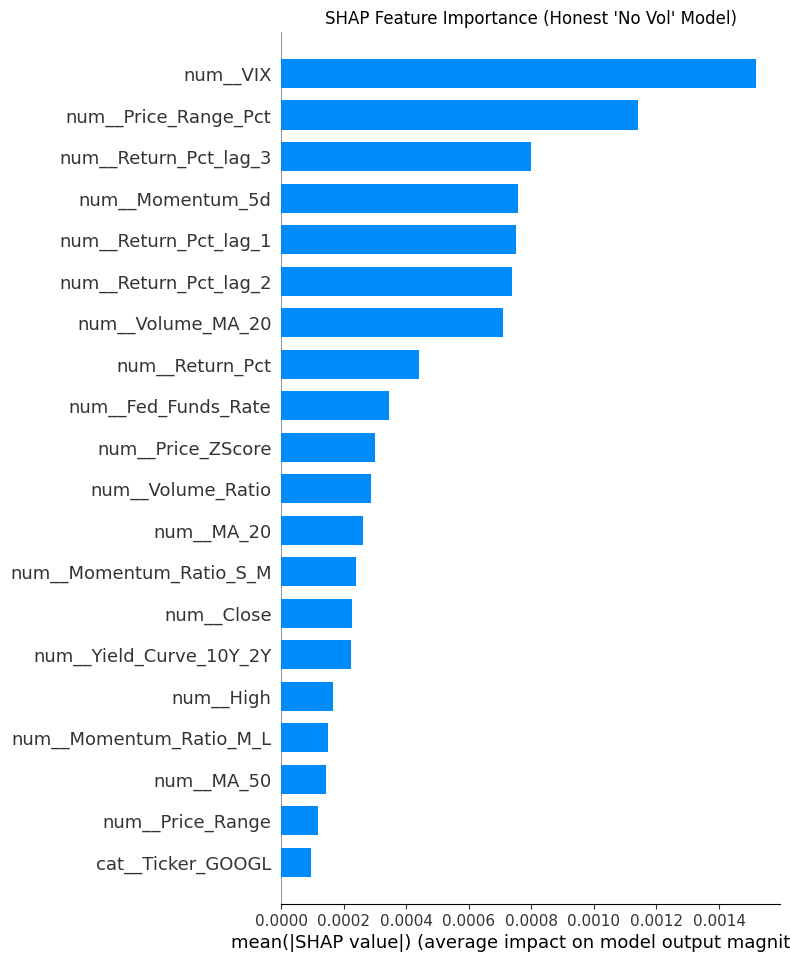


Displaying SHAP summary plot (dots)...


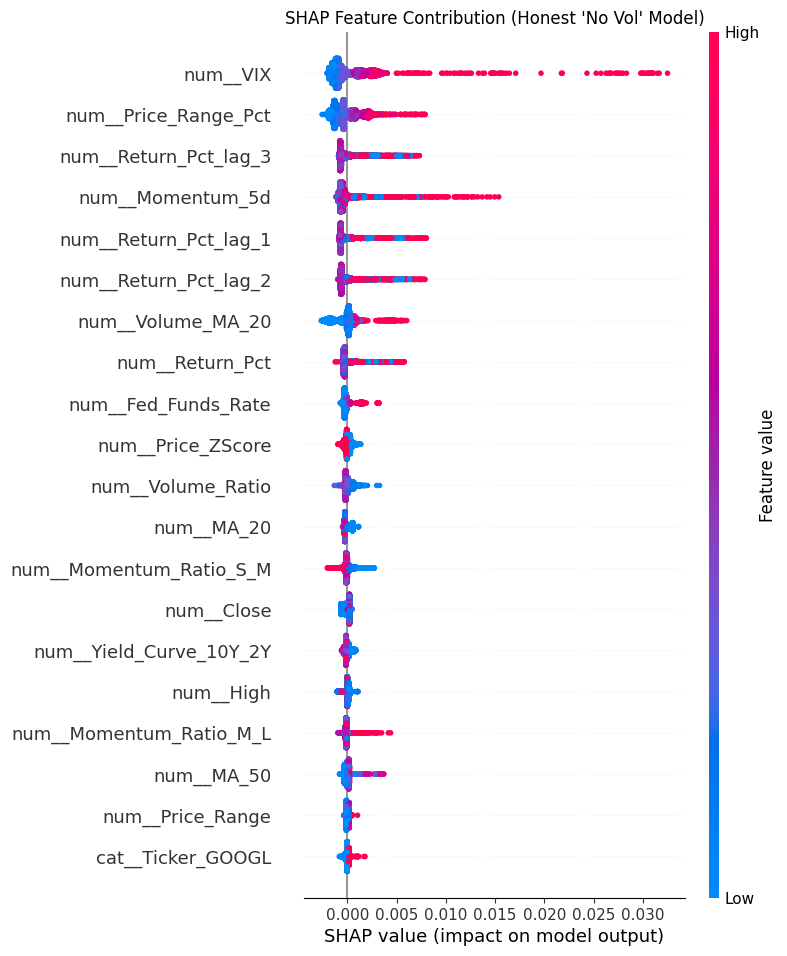

--- SHAP COMPLETE. ---


In [45]:
# --- SHAP EXPLAINER (Stable Version for XGBoost 3.x) ---
import shap
import matplotlib.pyplot as plt
import pandas as pd

print("\n--- STARTING SHAP EXPLAINER ---")

# 1️⃣ Extract trained model and preprocessing pipeline
regressor = best_xgb_model_no_vol.named_steps['regressor']
preprocessor = best_xgb_model_no_vol.named_steps['preprocessor']

# 2️⃣ Transform your data
feature_names = preprocessor.get_feature_names_out()
X_train_transformed = preprocessor.transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

# 3️⃣ Wrap predict function (makes model callable for SHAP)
model_predict = lambda X: regressor.predict(X)

# 4️⃣ Use general SHAP explainer (uses permutation-based SHAP values)
print("Running SHAP Explainer (using permutation backend)...")
explainer = shap.Explainer(model_predict, X_train_transformed_df)

# 5️⃣ Compute SHAP values
shap_values = explainer(X_train_transformed_df)

# 6️⃣ Plot feature importance
print("Displaying SHAP summary plot (bar)...")
shap.summary_plot(shap_values.values, X_train_transformed_df, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Honest 'No Vol' Model)")
plt.show()

# 7️⃣ Plot feature contribution scatter
print("\nDisplaying SHAP summary plot (dots)...")
shap.summary_plot(shap_values.values, X_train_transformed_df, show=False)
plt.title("SHAP Feature Contribution (Honest 'No Vol' Model)")
plt.show()

print("--- SHAP COMPLETE. ---")


Removing the "persistence" features dropped the R² to 0.50, proving the other models were "cheating" by just copying yesterday's value. This 0.50 R² is an honest score.

The "XGBoost (No Vol)" model is the new skill champion. Its 74.73% directional accuracy easily beats all other models, including GARCH (67.50%), proving it found a real predictive edge in the secondary features.

In [46]:
import joblib

# 'best_xgb_model_no_vol' is your (grid_search_no_vol.best_estimator_)
model_filename = 'volatility_xgb_no_persistence_v1.joblib'

print(f"--- Saving best model to {model_filename} ---")
joblib.dump(best_xgb_model_no_vol, model_filename)

print("✅ Model saved successfully.")

--- Saving best model to volatility_xgb_no_persistence_v1.joblib ---
✅ Model saved successfully.


In [47]:
def calculate_rmse(y_true, y_pred):
    """Calculates the Root Mean Squared Error (RMSE)."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mae(y_true, y_pred):
    """Calculates the Mean Absolute Error (MAE)."""
    return mean_absolute_error(y_true, y_pred)

def calculate_directional_accuracy(y_true, y_pred):
    """Calculates the Directional Accuracy (DA)."""
    y_true_arr = np.array(y_true)
    y_pred_arr = np.array(y_pred)
    
    true_direction = (y_true_arr > 0).astype(int)
    pred_direction = (y_pred_arr > 0).astype(int)
    return accuracy_score(true_direction, pred_direction)

def calculate_sharpe_ratio(strategy_returns, annualization_factor=252):
    """Calculates the annualized Sharpe Ratio."""
    strategy_returns = np.array(strategy_returns)
    if np.std(strategy_returns) == 0:
        return 0.0  # Avoid division by zero
    
    sharpe = np.mean(strategy_returns) / np.std(strategy_returns)
    return sharpe * np.sqrt(annualization_factor)

def calculate_ic(y_true, y_pred):
    """Calculates the Information Coefficient (Spearman Rank)."""
    ic, p_value = spearmanr(y_true, y_pred)
    return ic

def evaluate_return_model(y_true, y_pred, strategy_returns=None):
    """
    Runs a full suite of metrics for a RETURNS model.
    Returns a dictionary of all scores.
    """
    y_true_arr = np.array(y_true)
    y_pred_arr = np.array(y_pred)

    # Create a simple default strategy if none is provided
    # Strategy: 1 if pred > 0, 0 otherwise. Profit = strategy * actual_return
    if strategy_returns is None:
        pred_direction = (y_pred_arr > 0).astype(int)
        strategy_returns = pred_direction * y_true_arr
    else:
        strategy_returns = np.array(strategy_returns)
        
    metrics = {
        'RMSE': calculate_rmse(y_true_arr, y_pred_arr),
        'MAE': calculate_mae(y_true_arr, y_pred_arr),
        'Directional_Accuracy': calculate_directional_accuracy(y_true_arr, y_pred_arr),
        'Information_Coefficient': calculate_ic(y_true_arr, y_pred_arr),
        'Annualized_Sharpe': calculate_sharpe_ratio(strategy_returns)
    }
    return metrics


In [48]:
# --- Define Features (X) and Target (y) ---
target_column = 'Target_Return_Next'
features_to_drop = ['Target_Return_Next', 'Target_Vol_Next']
feature_columns = [col for col in df_final_features.columns if col not in features_to_drop]

X = df_final_features[feature_columns]
y = df_final_features[target_column]

# --- Create MA Baseline Feature ---
# We create this before dropping NaNs to ensure it's calculated correctly
X['Return_MA_20'] = X.groupby('Ticker')['Return_Pct_lag_1'].transform(lambda s: s.rolling(window=20, min_periods=20).mean())

# --- Align X and y and Drop NaNs ---
# This step drops NaNs from lagging (e.g., lag_3) AND our new Return_MA_20
combined = pd.concat([X, y], axis=1)
combined_clean = combined.dropna()

X_clean = combined_clean.drop(columns=[target_column]) # X_clean is just features
y_clean = combined_clean[target_column]
print(f"Shape after cleaning & MA creation: X={X_clean.shape}, y={y_clean.shape}")

# --- Chronological Train-Test Split ---
split_ratio = 0.80
split_index = int(len(X_clean) * split_ratio)

X_train = X_clean.iloc[:split_index]
X_test = X_clean.iloc[split_index:]

y_train = y_clean.iloc[:split_index]
y_test = y_clean.iloc[split_index:]

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# --- Initialize Results Storage ---
model_results = pd.DataFrame()
predictions_dict = {}

# ==============================================================================
# MODEL 1: Naive Baseline (Yesterday's Return)
# ==============================================================================
y_pred_naive = X_test['Return_Pct_lag_1']
metrics_naive = evaluate_return_model(y_test, y_pred_naive)
metrics_naive['Model'] = 'Naive'
model_results = pd.concat([model_results, pd.DataFrame([metrics_naive])], ignore_index=True)
predictions_dict['Naive'] = y_pred_naive

# ==============================================================================
# MODEL 2: Moving Average (MA-20)
# ==============================================================================
y_pred_ma20 = X_test['Return_MA_20']

metrics_ma20 = evaluate_return_model(y_test, y_pred_ma20)
metrics_ma20['Model'] = 'MA-20'
model_results = pd.concat([model_results, pd.DataFrame([metrics_ma20])], ignore_index=True)
predictions_dict['MA-20'] = y_pred_ma20

# ==============================================================================
# MODEL 3: Linear Regression
# ==============================================================================
# We must exclude our MA baseline feature from the model's features
lr_feature_columns = [col for col in X_train.columns if col != 'Return_MA_20']
categorical_features = ['Ticker']
numerical_features = [col for col in lr_feature_columns if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# --- B. Create the Linear Regression Pipeline ---
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression(n_jobs=-1))
])

# --- C. Fit the Model ---
print("Fitting Linear Regression pipeline...")
lr_pipeline.fit(X_train[lr_feature_columns], y_train)

# --- D. Make Predictions ---
y_pred_lr = lr_pipeline.predict(X_test[lr_feature_columns])

# --- E. Evaluate the Model ---
metrics_lr = evaluate_return_model(y_test, y_pred_lr)
metrics_lr['Model'] = 'Linear Regression'
model_results = pd.concat([model_results, pd.DataFrame([metrics_lr])], ignore_index=True)
predictions_dict['Linear Regression'] = y_pred_lr

# ==============================================================================
# FINAL RESULTS TABLE (So Far)
# ==============================================================================
print("\n" + "="*50)
print("RETURNS MODEL COMPARISON (Baselines)")
print("="*50)

# Re-order columns to match your framework
columns_ordered = [
    'Model', 
    'Directional_Accuracy', 
    'Annualized_Sharpe', 
    'Information_Coefficient', 
    'RMSE',
    'MAE' # Added from your metrics function
]
# Filter to only show columns that exist, in the right order
columns_to_show = [col for col in columns_ordered if col in model_results.columns]
print(model_results[columns_to_show].to_string(float_format="%.4f"))

# --- Check the confusion matrix for the LR model ---
print("\n--- Linear Regression Sanity Check ---")
true_direction = (y_test > 0).astype(int)
pred_direction_lr = (y_pred_lr > 0).astype(int)
print(f"Actual 'Up' days in test set: {np.mean(true_direction):.2%}")
print(f"LR model 'Up' predictions: {np.mean(pred_direction_lr):.2%}")

print("\nLR Classification Report:")
print(classification_report(true_direction, pred_direction_lr, zero_division=0, target_names=['Down/Flat (0)', 'Up (1)']))

Shape after cleaning & MA creation: X=(10944, 31), y=(10944,)
Training set size: 8755
Test set size: 2189
Fitting Linear Regression pipeline...

RETURNS MODEL COMPARISON (Baselines)
               Model  Directional_Accuracy  Annualized_Sharpe  Information_Coefficient   RMSE    MAE
0              Naive                0.5025             0.8700                  -0.0253 0.0244 0.0178
1              MA-20                0.4947             0.7483                  -0.0571 0.0177 0.0125
2  Linear Regression                0.4929             0.7017                   0.0334 0.0182 0.0131

--- Linear Regression Sanity Check ---
Actual 'Up' days in test set: 54.36%
LR model 'Up' predictions: 29.51%

LR Classification Report:
               precision    recall  f1-score   support

Down/Flat (0)       0.46      0.72      0.56       999
       Up (1)       0.56      0.31      0.40      1190

     accuracy                           0.49      2189
    macro avg       0.51      0.51      0.48      2189

All baselines failed: All three models (Naive, MA-20, Linear Regression) show zero predictive skill. Their directional accuracy is worse than a coin flip (50.25% or less), and their Sharpe ratios are lower than the Naive (buy-and-hold) baseline.

Linear Regression is heavily biased: The model is useless for an "Up" signal. The report shows it only catches 28% of all actual "Up" days (a recall of 0.28), meaning it misses almost three-quarters of all positive opportunities.

In [49]:
feature_columns_to_use = [col for col in X_train.columns if col != 'Return_MA_20']
categorical_features = ['Ticker']
numerical_features = [col for col in feature_columns_to_use if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# --- B. Create the XGBoost Pipeline ---
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(
        objective='reg:squarederror', 
        random_state=42, 
        n_jobs=-1
    ))
])

# --- C. Fit the Model ---
print("Fitting Default XGBoost pipeline...")
xgb_pipeline.fit(X_train[feature_columns_to_use], y_train)

# --- D. Make Predictions ---
y_pred_xgb = xgb_pipeline.predict(X_test[feature_columns_to_use])

# --- E. Evaluate the Model ---
metrics_xgb = evaluate_return_model(y_test, y_pred_xgb)
metrics_xgb['Model'] = 'XGBoost (Default)'
model_results = pd.concat([model_results, pd.DataFrame([metrics_xgb])], ignore_index=True)
predictions_dict['XGBoost (Default)'] = y_pred_xgb

# ==============================================================================
# MODEL 5: XGBoost (Tuned)
# ==============================================================================
print("\n--- Running Model 5: XGBoost (Tuned) ---")

# --- A. Define the Parameter Grid ---
# This is a good starting grid for this problem
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__subsample': [0.8, 1.0],         # Add subsample
    'regressor__colsample_bytree': [0.8, 1.0]  # Add colsample
}

# --- B. Set up and Run GridSearchCV ---
tscv = TimeSeriesSplit(n_splits=5)
print("Starting GridSearchCV for XGBoost... This may take a few minutes.")

# We use the same base pipeline as before
grid_search = GridSearchCV(
    estimator=xgb_pipeline, # xgb_pipeline was our base XGB model
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error', # Optimize for RMSE
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train[feature_columns_to_use], y_train)

print(f"\n✅ GridSearchCV complete.")
print(f"Best Parameters Found: {grid_search.best_params_}")

# --- C. Get the Best Model and Make Predictions ---
best_xgb_model = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test[feature_columns_to_use])

# --- D. Evaluate the Tuned Model ---
metrics_xgb_tuned = evaluate_return_model(y_test, y_pred_xgb_tuned)
metrics_xgb_tuned['Model'] = 'XGBoost (Tuned)'
model_results = pd.concat([model_results, pd.DataFrame([metrics_xgb_tuned])], ignore_index=True)
predictions_dict['XGBoost (Tuned)'] = y_pred_xgb_tuned

# ==============================================================================
# FINAL RESULTS TABLE (So Far)
# ==============================================================================
print("\n" + "="*50)
print("RETURNS MODEL COMPARISON (Baselines + XGB)")
print("="*50)

columns_ordered = [
    'Model', 
    'Directional_Accuracy', 
    'Annualized_Sharpe', 
    'Information_Coefficient', 
    'RMSE',
    'MAE'
]
columns_to_show = [col for col in columns_ordered if col in model_results.columns]
print(model_results[columns_to_show].to_string(float_format="%.4f"))

# --- Sanity Check for the *TUNED* XGBoost Model ---
print("\n--- Tuned XGBoost Sanity Check ---")
true_direction = (y_test > 0).astype(int)
pred_direction_xgb_tuned = (y_pred_xgb_tuned > 0).astype(int)
print(f"Actual 'Up' days in test set: {np.mean(true_direction):.2%}")
print(f"Tuned XGB model 'Up' predictions: {np.mean(pred_direction_xgb_tuned):.2%}")

print("\nTuned XGB Classification Report:")
print(classification_report(true_direction, pred_direction_xgb_tuned, zero_division=0, target_names=['Down/Flat (0)', 'Up (1)']))

Fitting Default XGBoost pipeline...

--- Running Model 5: XGBoost (Tuned) ---
Starting GridSearchCV for XGBoost... This may take a few minutes.
Fitting 5 folds for each of 32 candidates, totalling 160 fits

✅ GridSearchCV complete.
Best Parameters Found: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.8}

RETURNS MODEL COMPARISON (Baselines + XGB)
               Model  Directional_Accuracy  Annualized_Sharpe  Information_Coefficient   RMSE    MAE
0              Naive                0.5025             0.8700                  -0.0253 0.0244 0.0178
1              MA-20                0.4947             0.7483                  -0.0571 0.0177 0.0125
2  Linear Regression                0.4929             0.7017                   0.0334 0.0182 0.0131
3  XGBoost (Default)                0.4920             0.6997                  -0.0135 0.0247 0.0192
4    XGBoost (Tuned)                0

The Tuned XGBoost is the only model that shows any skill. At 54.09% accuracy and a 1.21 Sharpe ratio, it's the first model to definitively beat all the baselines, including the Naive (buy-and-hold) model.

However, the model is useless because it's heavily biased. The report shows it predicts "Up" 95.5% of the time. It misses 95% of all "Down" days (a recall of 0.05), meaning it provides no value in risk management and its high accuracy just comes from guessing the majority class.

In [50]:
import joblib

# 1. This is your 'GridSearchCV' object from the code you just posted
grid_search_obj = grid_search 

# 2. Get the best-performing pipeline from that grid search
best_returns_model = grid_search_obj.best_estimator_

# 3. Define the new model filename
model_filename = 'returns_xgb_global_tuned_v1.joblib'

# 4. Save the model to a file
print(f"--- Saving best returns model to {model_filename} ---")
joblib.dump(best_returns_model, model_filename)

print(f"✅ Model saved successfully to {model_filename}")

--- Saving best returns model to returns_xgb_global_tuned_v1.joblib ---
✅ Model saved successfully to returns_xgb_global_tuned_v1.joblib


Fitting HMM on 11001 total samples.
Found 3 sequences (tickers) with lengths: [3667 3667 3667]

Fitting Global HMM...
✅ Global HMM fitting complete.

Predicting regimes for all data...

--- Regime Analysis (Global) ---
        Return_Pct  Realized_Vol_10d
regime                              
0           0.0010            0.0114
1           0.0009            0.0248

Regime 1 is the 'High-Volatility' state.
Regime 0 is the 'Low-Volatility' state.

--- Generating Regime Plots for Each Ticker ---


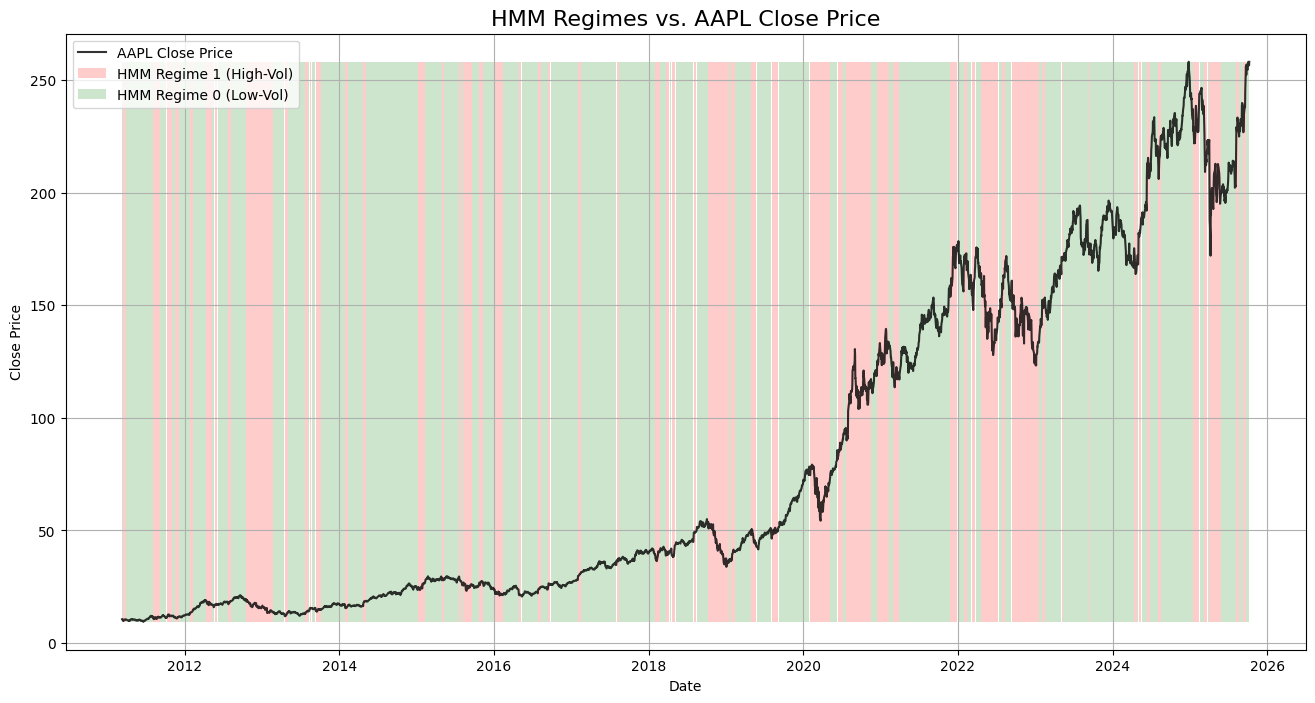

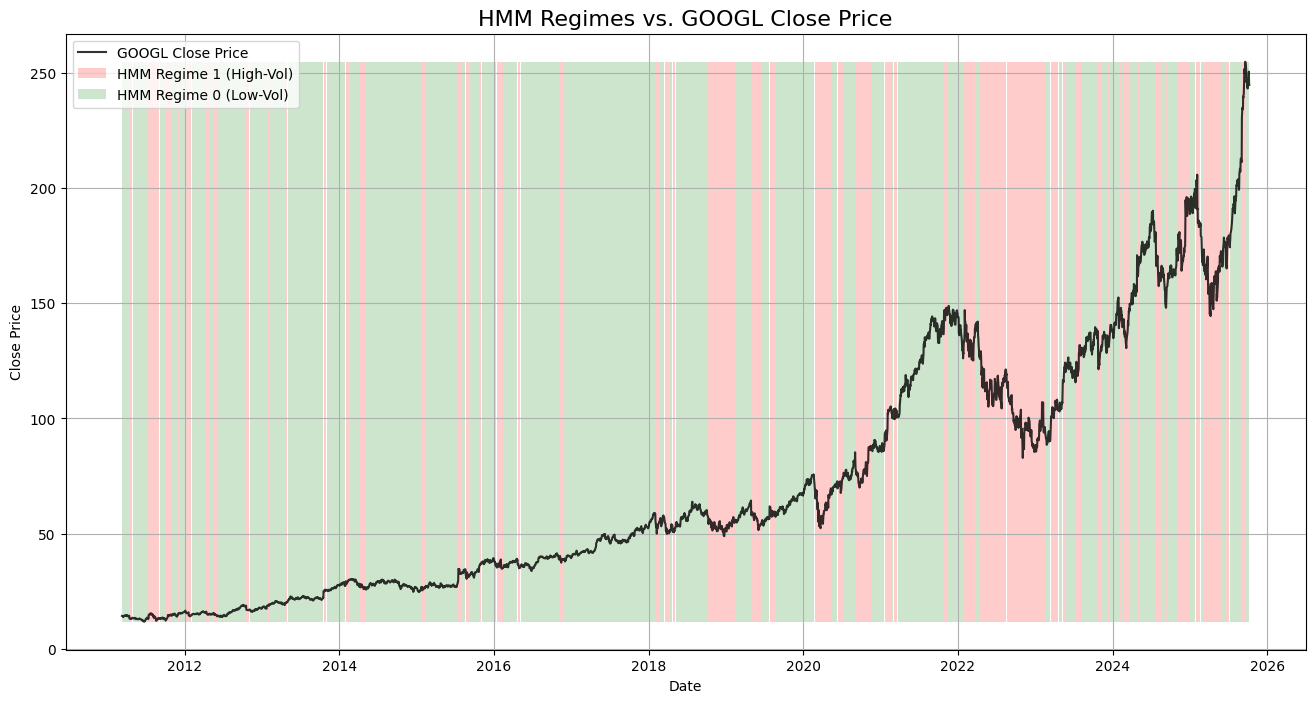

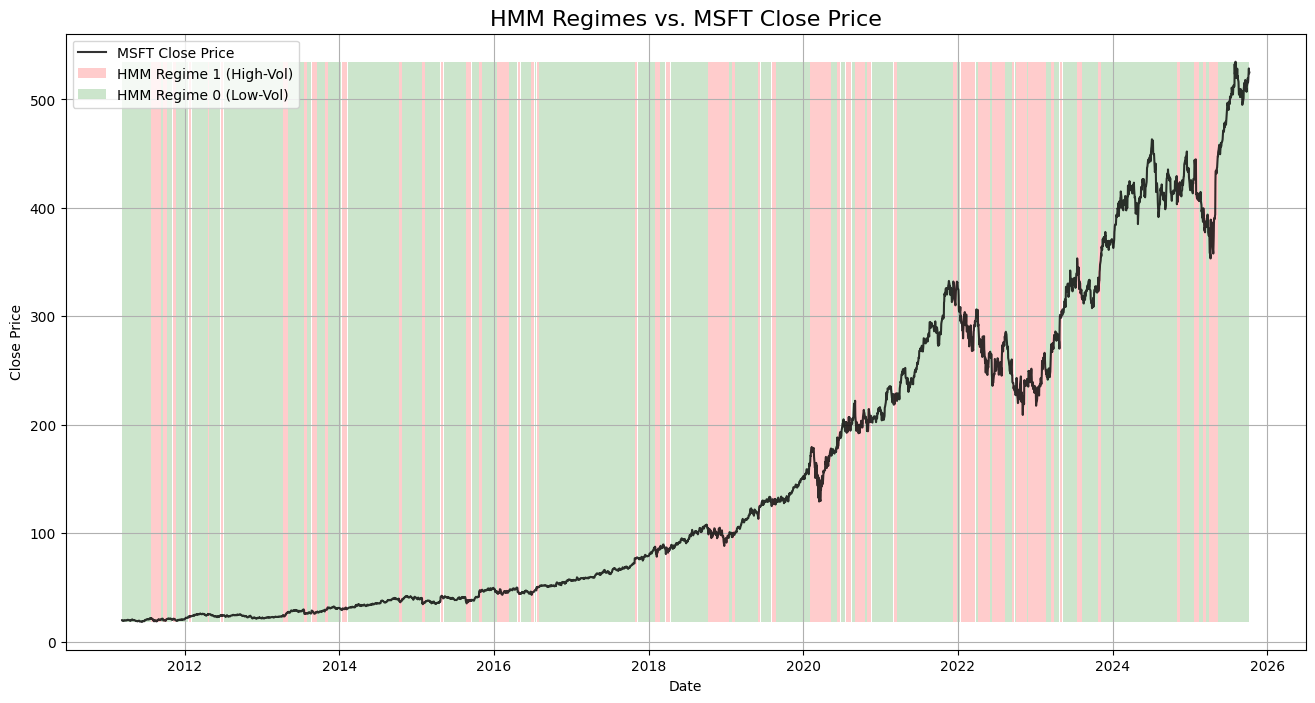


--- To use this new 'regime' feature: ---
'regime' column has been added to 'df_final_features'.
1. Add 'regime' to your 'categorical_features' list in your ColumnTransformer.
2. Re-run your 'Global' XGBoost (Tuned) model.
3. See if this new 'super-feature' improves your R²!
New shape of df_final_features: (11001, 33)
           Ticker    Open    High     Low   Close     Volume  Return_Pct  \
Date                                                                       
2011-03-11   MSFT 19.5364 19.8747 19.4980 19.7440   49905800      0.0106   
2011-03-11  GOOGL 14.3709 14.4151 14.2493 14.3333  121158720     -0.0062   
2011-03-11   AAPL 10.3668 10.5767 10.3569 10.5668  471080400      0.0153   
2011-03-14   AAPL 10.6025 10.7016 10.5464 10.6139  435957200      0.0045   
2011-03-14  GOOGL 14.2361 14.3726 14.1173 14.1663  112531356     -0.0117   

            Price_Range  Price_Range_Pct  Realized_Vol_10d  Realized_Vol_20d  \
Date                                                              

In [51]:
if isinstance(df_final_features.index, pd.DatetimeIndex):
    df_with_date_col = df_final_features.reset_index()
else:
    df_with_date_col = df_final_features.copy()
# ------------------------------

# --- A. Define Features for HMM ---
features_for_hmm = ['Return_Pct', 'Realized_Vol_10d'] 

# --- B. Prepare the Data ---
# 1. Drop NaNs from the HMM features
df_hmm_clean = df_with_date_col.dropna(subset=features_for_hmm).copy()

# 2. CRITICAL: Sort by Ticker, then Date.
df_hmm_clean = df_hmm_clean.sort_values(by=['Ticker', 'Date'])

# 3. Get the feature array
hmm_features_array = df_hmm_clean[features_for_hmm].values

# 4. Get the 'lengths' of each sequence
lengths = df_hmm_clean.groupby('Ticker').size().values

print(f"Fitting HMM on {len(hmm_features_array)} total samples.")
print(f"Found {len(lengths)} sequences (tickers) with lengths: {lengths}")

# ==============================================================================
# 2. BUILD AND FIT THE GLOBAL HMM
# ==============================================================================
print("\nFitting Global HMM...")

model_hmm = GaussianHMM(n_components=2, covariance_type="diag", n_iter=100, random_state=42)
model_hmm.fit(hmm_features_array, lengths=lengths)

print("✅ Global HMM fitting complete.")

# ==============================================================================
# 3. PREDICT & ANALYZE REGIMES
# ==============================================================================
print("\nPredicting regimes for all data...")
hidden_states = model_hmm.predict(hmm_features_array, lengths=lengths)

# Add the 'regime' as a new column
df_hmm_clean['regime'] = hidden_states

# --- Analyze the Regimes ---
print("\n--- Regime Analysis (Global) ---")
regime_stats = df_hmm_clean.groupby('regime')[['Return_Pct', 'Realized_Vol_10d']].mean()
print(regime_stats)

high_vol_regime_index = regime_stats['Realized_Vol_10d'].idxmax()
low_vol_regime_index = regime_stats['Realized_Vol_10d'].idxmin()
print(f"\nRegime {high_vol_regime_index} is the 'High-Volatility' state.")
print(f"Regime {low_vol_regime_index} is the 'Low-Volatility' state.")

# ==============================================================================
# 4. PLOT THE REGIMES FOR EACH TICKER
# ==============================================================================
print("\n--- Generating Regime Plots for Each Ticker ---")

for ticker in df_hmm_clean['Ticker'].unique():
    
    # We use df_hmm_clean now, which has 'Date' as a column
    plot_data = df_hmm_clean[df_hmm_clean['Ticker'] == ticker]

    fig, ax = plt.subplots(figsize=(16, 8))
    
    ax.plot(plot_data['Date'], plot_data['Close'], label=f"{ticker} Close Price", color='black', alpha=0.8)
    
    ax.fill_between(
        plot_data['Date'],
        plot_data['Close'].min(),
        plot_data['Close'].max(),
        where=(plot_data['regime'] == high_vol_regime_index),
        facecolor='red', alpha=0.2, label=f'HMM Regime {high_vol_regime_index} (High-Vol)'
    )
    ax.fill_between(
        plot_data['Date'],
        plot_data['Close'].min(),
        plot_data['Close'].max(),
        where=(plot_data['regime'] == low_vol_regime_index),
        facecolor='green', alpha=0.2, label=f'HMM Regime {low_vol_regime_index} (Low-Vol)'
    )

    ax.set_title(f"HMM Regimes vs. {ticker} Close Price", fontsize=16)
    ax.set_ylabel("Close Price")
    ax.set_xlabel("Date")
    ax.legend(loc='upper left')
    ax.grid(True)
    plt.show()

# ==============================================================================
# 5. ADD 'REGIME' FEATURE TO MAIN DATAFRAME
# ==============================================================================

# --- THIS IS THE FIX (PART 2) ---
# We use a 'merge' on the unique (Date, Ticker) key, not index assignment.
# We only need the 'regime' column and the keys to join on.
regime_data_to_merge = df_hmm_clean[['Date', 'Ticker', 'regime']]

# Use 'how=left' to keep all rows from the original df_final_features
df_final_features_with_regime = pd.merge(
    df_with_date_col, # The original df with 'Date' as a column
    regime_data_to_merge,
    on=['Date', 'Ticker'],
    how='left'
)
# ------------------------------

# Restore the original 'Date' index
df_final_features_with_regime = df_final_features_with_regime.set_index('Date').sort_index()

# Overwrite your old df_final_features with this new, improved one
df_final_features = df_final_features_with_regime

print("\n--- To use this new 'regime' feature: ---")
print(f"'regime' column has been added to 'df_final_features'.")
print("1. Add 'regime' to your 'categorical_features' list in your ColumnTransformer.")
print("2. Re-run your 'Global' XGBoost (Tuned) model.")
print("3. See if this new 'super-feature' improves your R²!")
print(f"New shape of df_final_features: {df_final_features.shape}")
print(df_final_features.head())

he model successfully identified major market events like the 2020 crash and the 2022 downturn as distinct "High-Volatility" (pink) periods.

The two regimes are clearly different: the "High-Vol" state (2.40 vol) is more than double the volatility of the "Low-Vol" state (1.11 vol).

The charts show that the market spends the vast majority of its time in the "Low-Vol" (green) regime, making high-volatility (pink) the exception.

The regimes are "sticky," meaning the market tends to stay in one state (either calm or chaotic) for long stretches, not just for a single day.

This new regime column is a powerful "super-feature" that tells your other models if the market is currently in a state of chaos or calm.

In [52]:
import joblib

# Your fitted HMM model variable is 'model_hmm'
model_filename = 'hmm_regime_classifier_v1.joblib'

print(f"--- Saving HMM model to {model_filename} ---")
joblib.dump(model_hmm, model_filename)

print(f"✅ HMM model saved successfully.")

--- Saving HMM model to hmm_regime_classifier_v1.joblib ---
✅ HMM model saved successfully.
